# Setup

Data are from Bluebell: `/mnt/data1/chris/projects/ileal-cd/analysis/cellranger/cr_count_2021-09-24` (CD-1, CD-2, CD-3, CD-4, where CD-1 & -2 are inflamed & uninflamed samplesm, respectively, from record_id FC_Hu_IL2, and CD-3 & -4 are inflamed & un-inflamed samples from FC_Hu_IL3). 

I stored the filtered matrices under four directories named with the convention "/home/asline01/projects/data/ileal-cd/CD-#/filtered_feature_bc_matrix" (where # is 1-4). For example, `/mnt/data1/chris/projects/ileal-cd/analysis/cellranger/cr_count_2021-09-24/outs/filtered_feature_bc_matrix` on Bluebell is stored locally in `/home/asline01/projects/data/ileal-cd/CD-1/filtered_feature_bc_matrix`.

Change the variable `ddd` below to your directory. If you download more subjects/samples, store using the same convention described above, and change the variable `subs` below so that the code includes those directories.

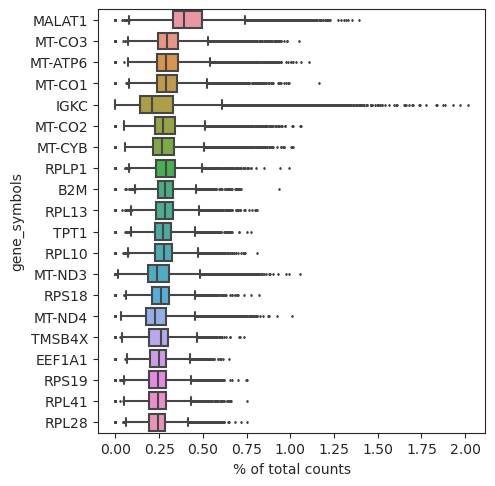


	*** Detecting Mitochondrial, Ribosomal, Hemoglobin genes...

	*** Calculating & plotting QC metrics...




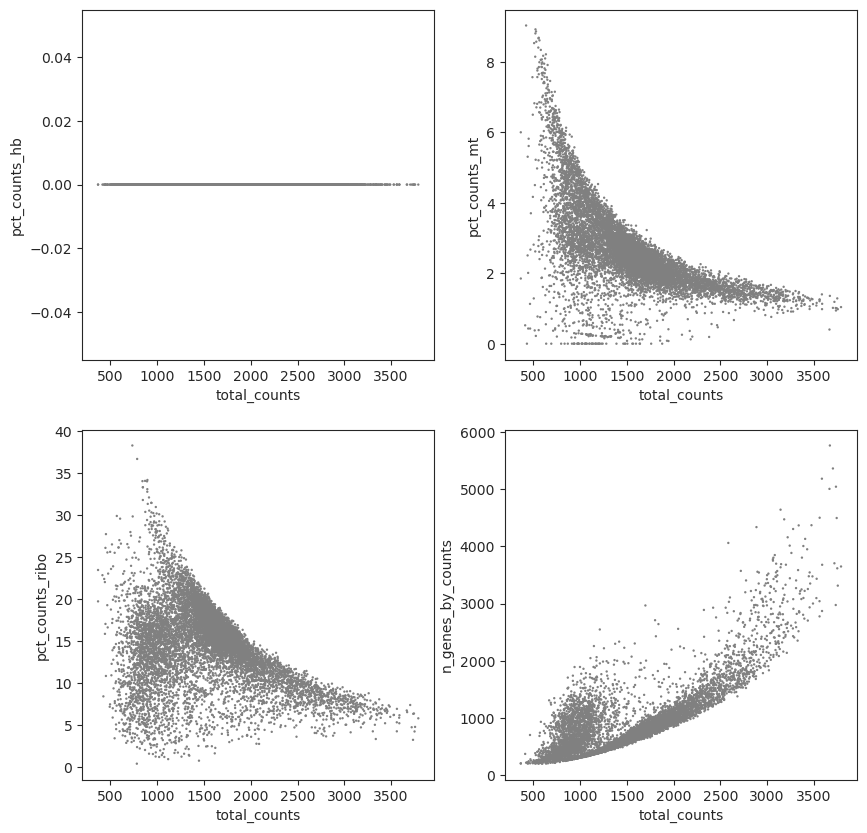

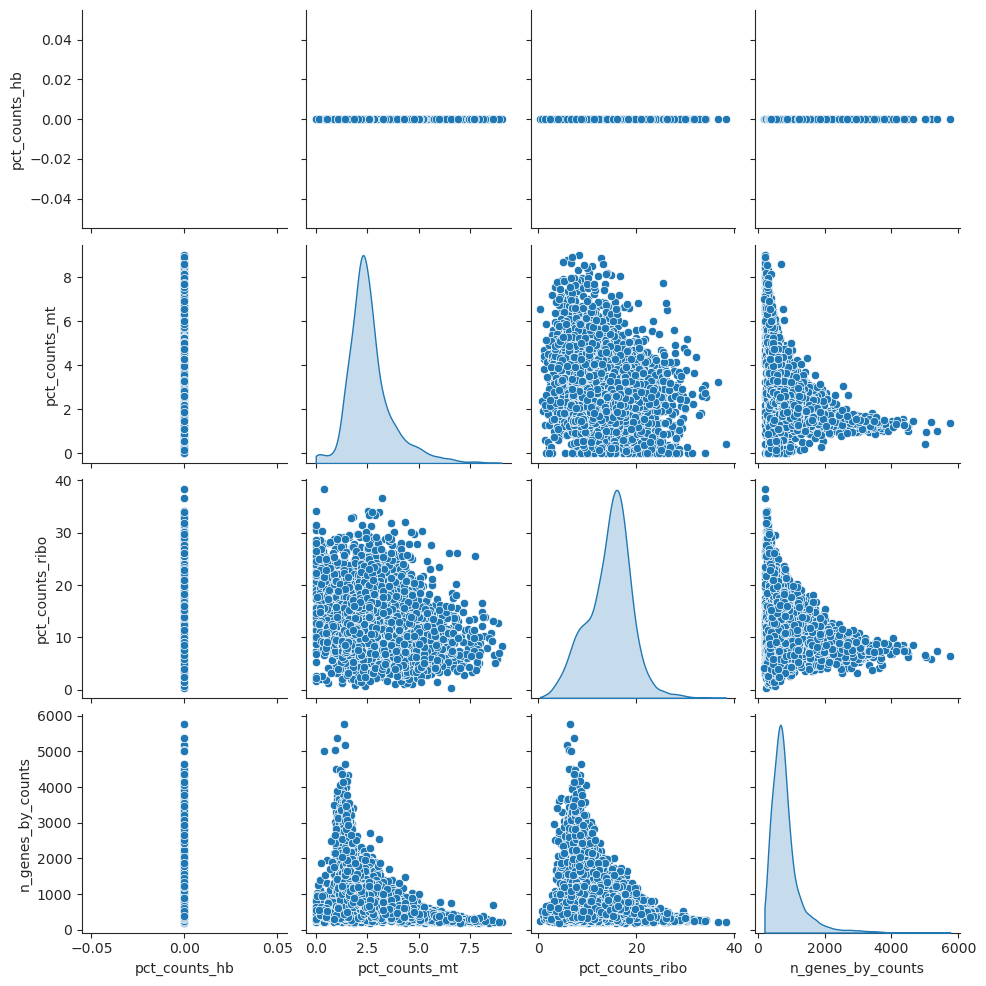

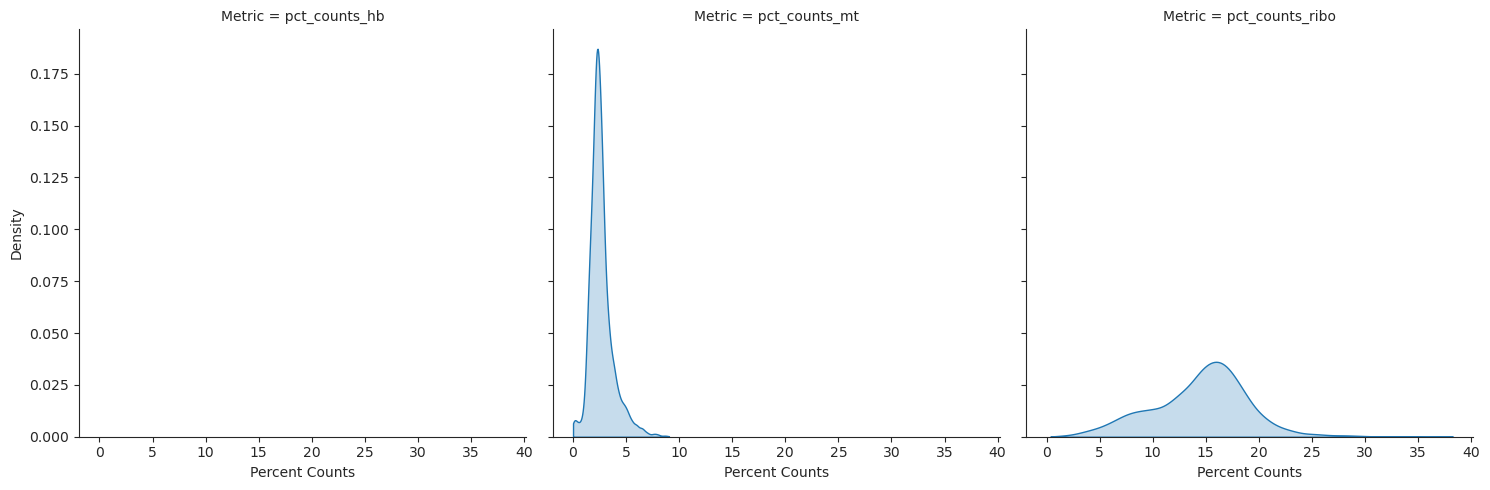

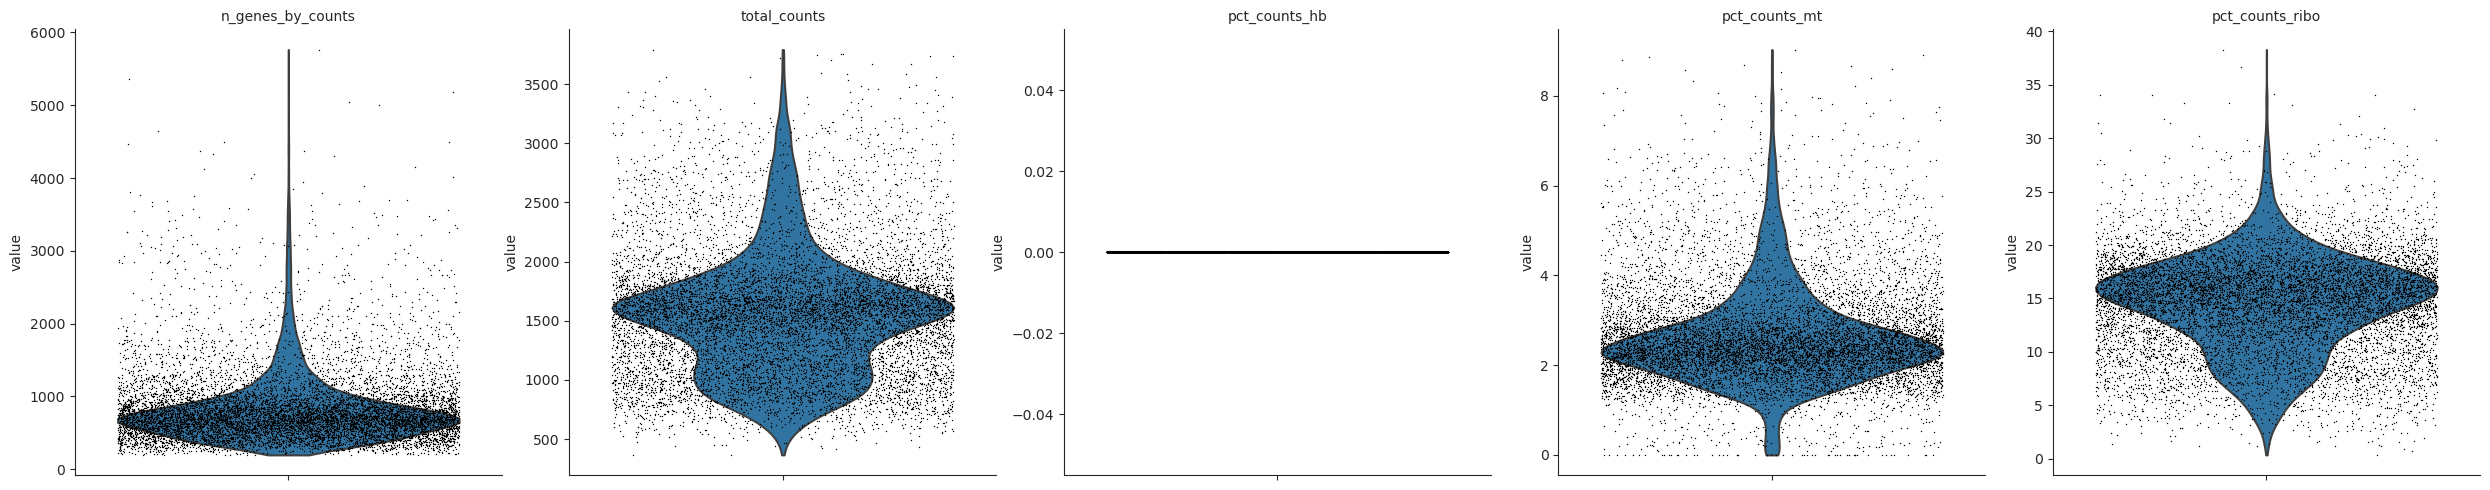

       n_cells_by_counts-CD-1  mean_counts-CD-1  log1p_mean_counts-CD-1  \
count                 17351.0      1.735100e+04            1.735100e+04   
mean                   3834.0      4.219429e-10            4.219036e-10   
std                       0.0      2.801806e-07            2.801806e-07   
min                    3834.0     -2.084351e-06           -2.084354e-06   
25%                    3834.0     -1.650263e-07           -1.650263e-07   
50%                    3834.0      6.373997e-10            6.373997e-10   
75%                    3834.0      1.651059e-07            1.651059e-07   
max                    3834.0      1.506315e-06            1.506314e-06   

       pct_dropout_by_counts-CD-1  total_counts-CD-1  log1p_total_counts-CD-1  \
count                     17351.0       17351.000000             17351.000000   
mean                          0.0           0.000002                 0.000001   
std                           0.0           0.001074                 0.001074   


{'highly_expressed_genes': None,
 'qc_n_genes_by_counts_scatter': <Figure size 1000x1000 with 4 Axes>,
 'pairplot': <seaborn.axisgrid.PairGrid at 0x7faf57a91210>,
 'pct_counts_kde': <seaborn.axisgrid.FacetGrid at 0x7faf4ad779d0>,
 'metrics_violin': None,
 'qc_log': <seaborn.axisgrid.JointGrid at 0x7faf54c6a6e0>}

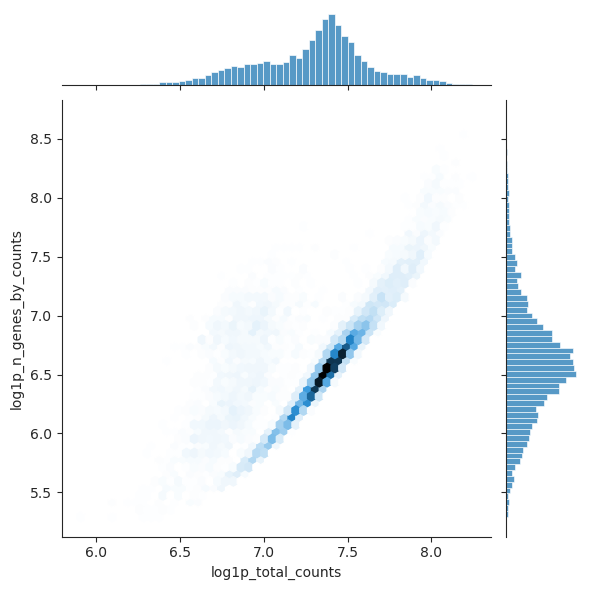

In [44]:
import crispr as cr 
cr.pp.perform_qc(self.rna.copy())

In [17]:
%load_ext autoreload
%autoreload 2

import os
from crispr.class_sc import Omics
import pandas as pd

ddd = "/home/asline01/projects/data/ileal-cd/"  # cellranger directory
subs = ["CD-1", "CD-2", "CD-3", "CD-4"]

file_path = dict(zip(subs, [os.path.join(ddd, x, "filtered_feature_bc_matrix") 
                            for x in subs]))
kws_harmony = {"plot_convergence": True,
               "random_state": 1618}
kws_umap = {"min_dist": 0.3}
kws_init = {"assay": None, "assay_protein": None, 
            "col_gene_symbols": "gene_symbols", 
            "col_cell_type": "majority_voting", 
            "col_condition": None, 
            "key_control": None, 
            "key_treatment": None}
kws_pp = {"kws_hvg": {"min_mean": 0.0125, "max_mean": 10, 
                      "min_disp": 0.5, "flavor": "cell_ranger"}, 
          "target_sum": 10000.0, "cell_filter_pmt": [0, 15], 
          "cell_filter_ngene": [200, None], "cell_filter_ncounts": [3, 40000], 
          "gene_filter_ncell": [3, None], "regress_out": None, 
          "kws_scale": "log", "kws_umap": kws_umap}
kws_cluster = {"method_cluster": "leiden", "kws_umap": kws_umap, 
               "kws_neighbors": None, 
               "kws_pca": {"n_comps": None, "use_highly_variable": True}, 
               "resolution": 0.5, "kws_cluster": {}}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Single-Cell Integrated Object Initialization



<<< INITIALIZING CRISPR CLASS OBJECT >>>




col_gene_symbols='gene_symbols'
col_cell_type='majority_voting'
col_sample_id='standard_sample_id'
col_batch='standard_sample_id'
col_condition=np.nan
key_control=np.nan
key_treatment=np.nan


<<< INITIALIZING CRISPR CLASS OBJECT >>>




col_gene_symbols='gene_symbols'
col_cell_type='majority_voting'
col_sample_id='standard_sample_id'
col_batch='standard_sample_id'
col_condition=np.nan
key_control=np.nan
key_treatment=np.nan

<<< LOADING 10X FILE /home/asline01/projects/data/ileal-cd/CD-1/filtered_feature_bc_matrix >>>


Cell Counts: Raw

4932


Gene Counts: Raw



 AnnData object with n_obs × n_vars = 4932 × 36601
    var: 'gene_ids', 'feature_types'
    layers: 'counts'


 AnnData object with n_obs × n_vars = 4932 × 36601
    var: 'gene_ids', 'feature_types'
    layers: 'counts'


<<< INITIALIZING CRISPR CLASS OBJECT >>>




col_gene_symbols='gene_symbols'
col_cell_type='majority_voting'
col_sample_id='standard_sample_id'
col_batch='stan

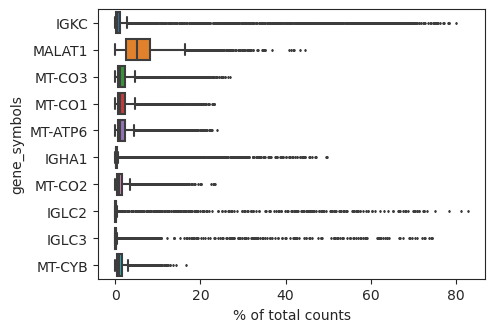


	*** Detecting Mitochondrial, Ribosomal, Hemoglobin genes...

	*** Calculating & plotting QC metrics...




... storing 'feature_types' as categorical


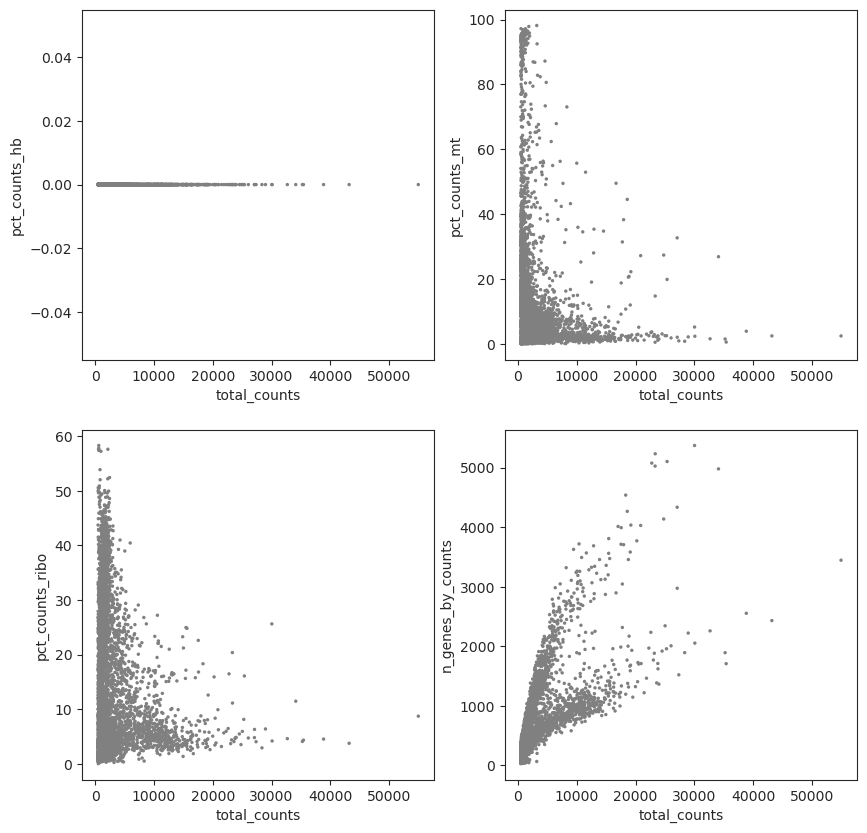

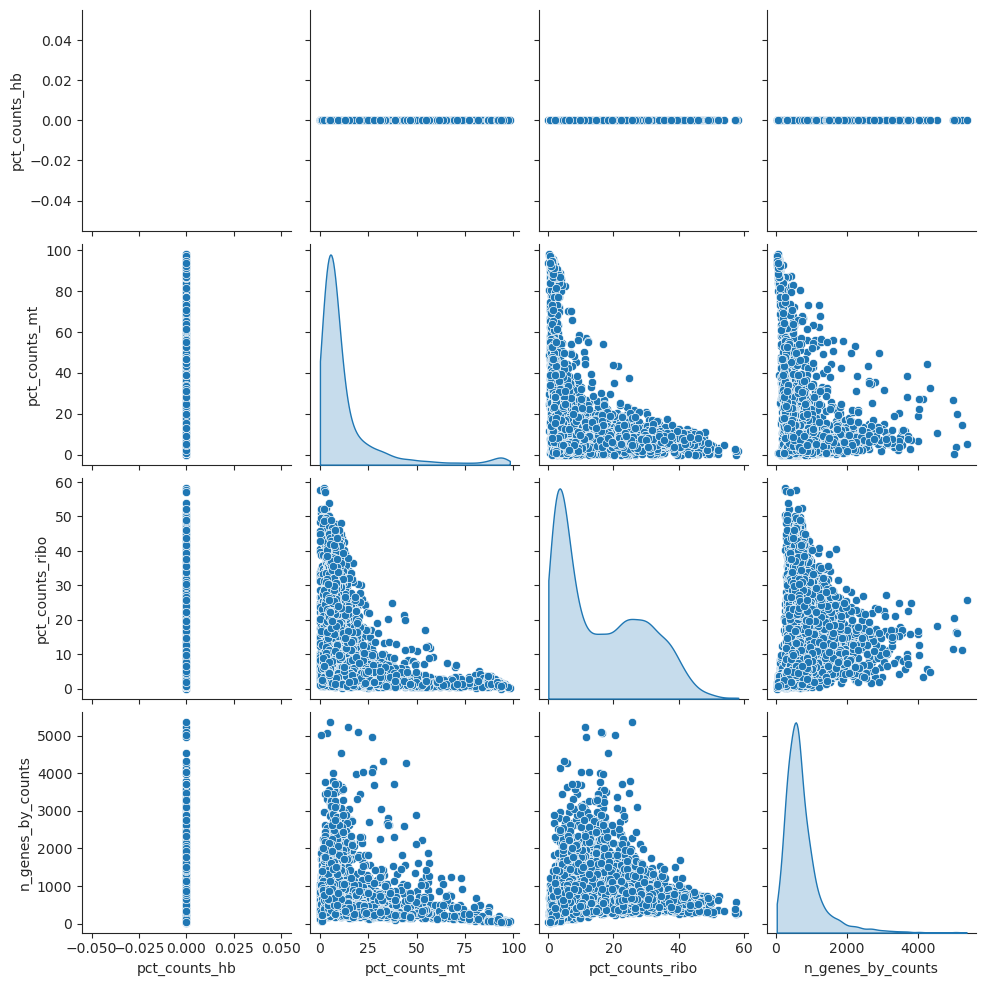

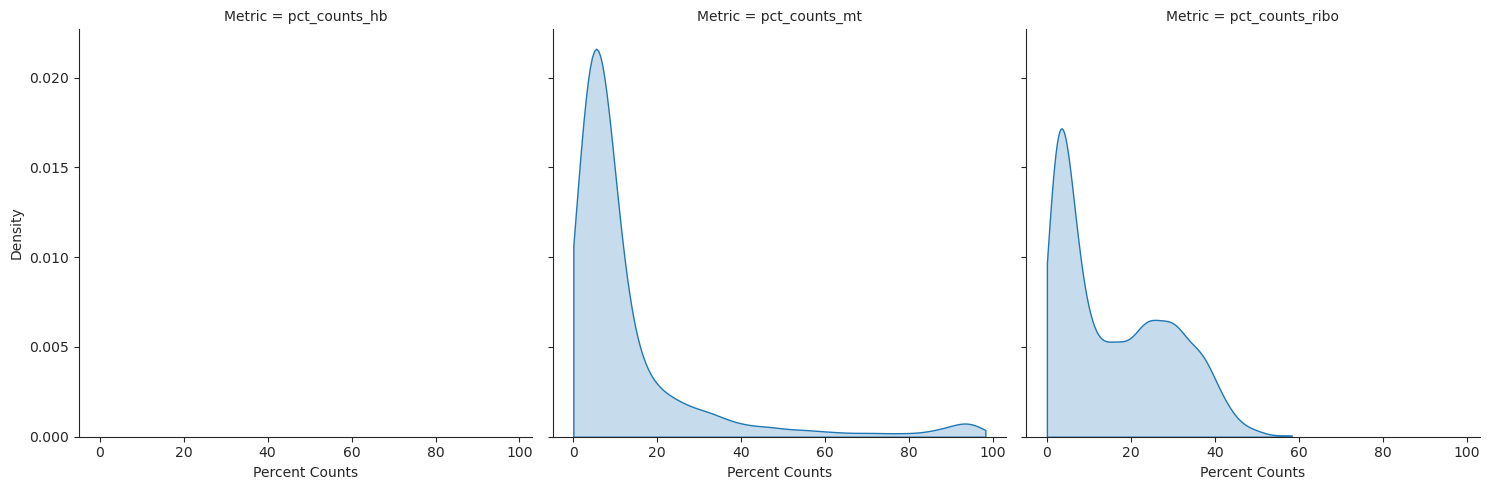

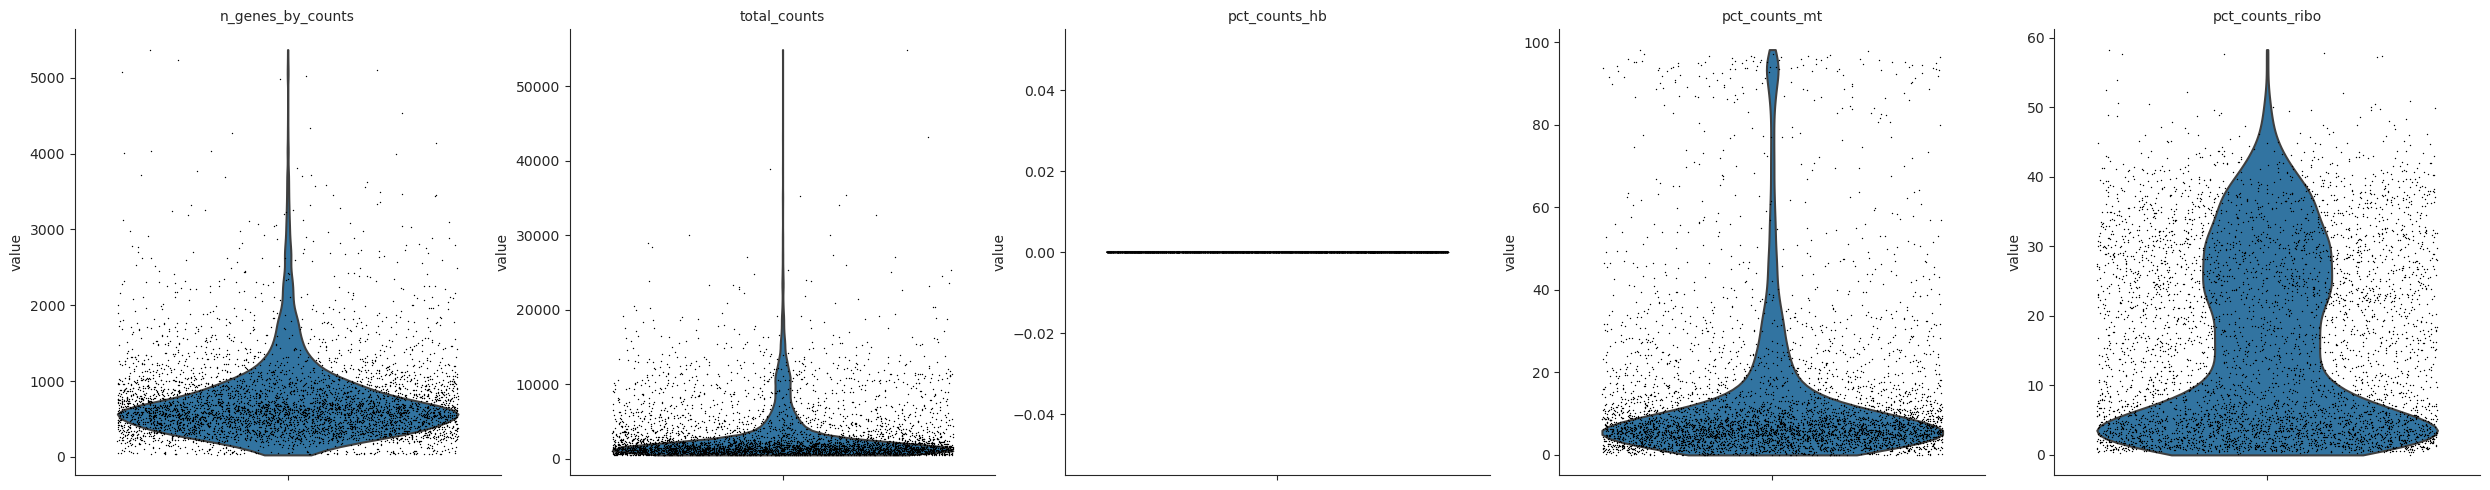

       n_cells_by_counts   mean_counts  log1p_mean_counts  \
count       36601.000000  36601.000000       36601.000000   
mean           99.487746      0.081977           0.030454   
std           317.243598      3.301122           0.149551   
min             0.000000      0.000000           0.000000   
25%             0.000000      0.000000           0.000000   
50%             2.000000      0.000406           0.000405   
75%            66.000000      0.015410           0.015292   
max          4885.000000    574.180847           6.354684   

       pct_dropout_by_counts  total_counts  log1p_total_counts  
count           36601.000000  3.660100e+04        36601.000000  
mean               97.982811  4.043123e+02            2.221017  
std                 6.432352  1.628113e+04            2.417464  
min                 0.952960  0.000000e+00            0.000000  
25%                98.661800  0.000000e+00            0.000000  
50%                99.959448  2.000000e+00            1.0986

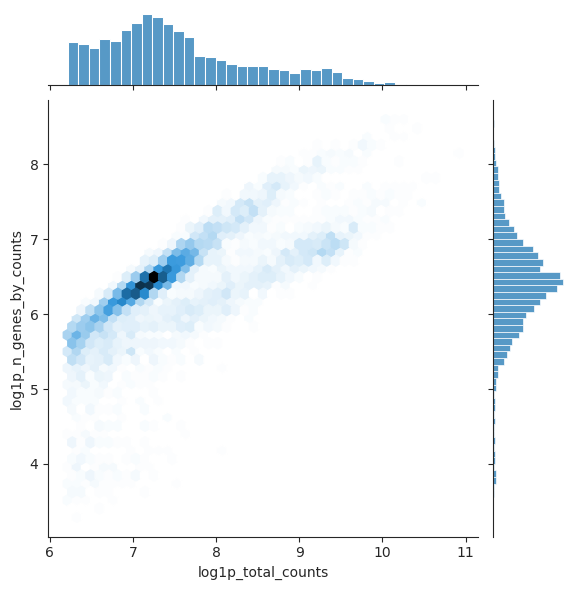

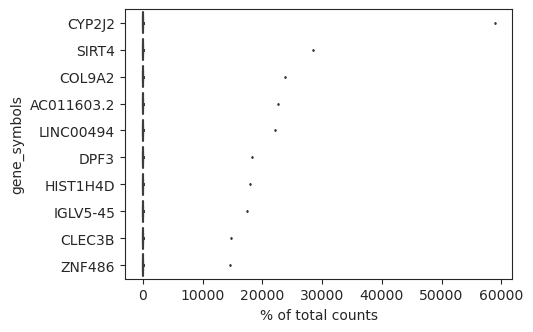


	*** Detecting Mitochondrial, Ribosomal, Hemoglobin genes...

	*** Calculating & plotting QC metrics...




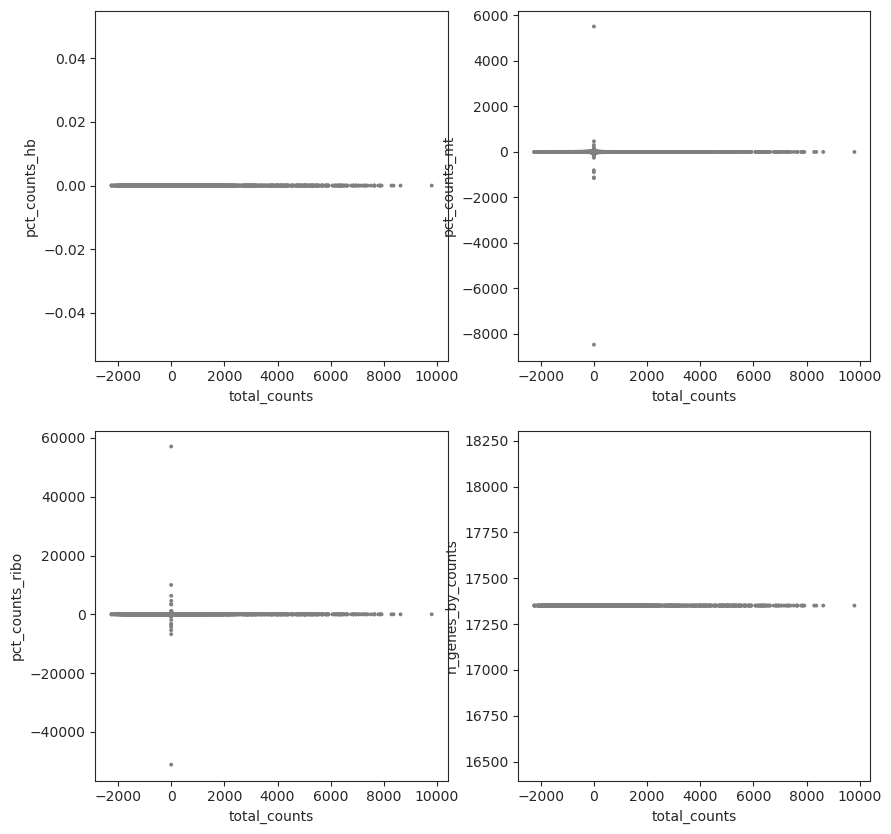

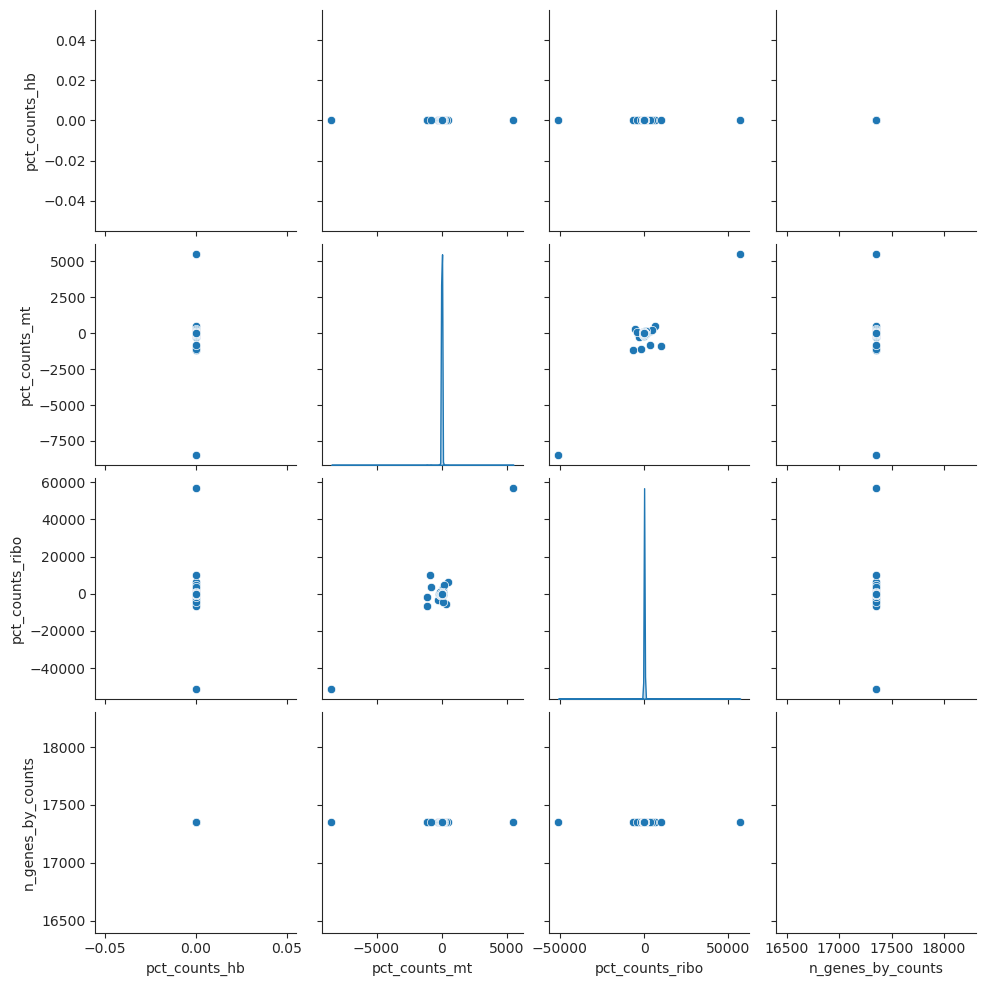

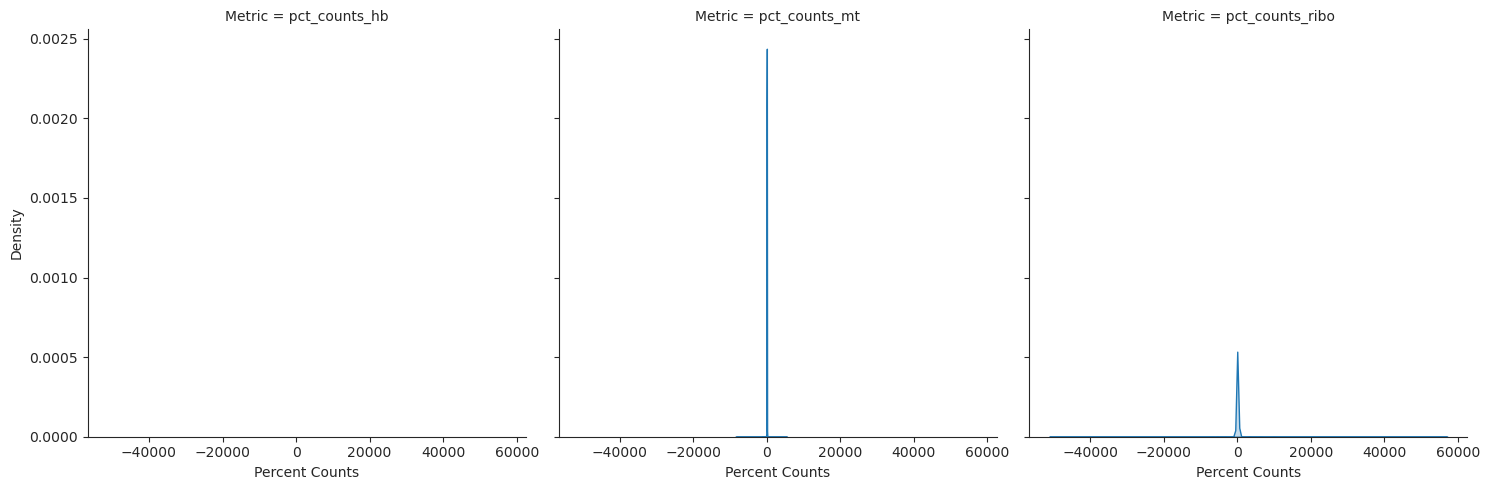

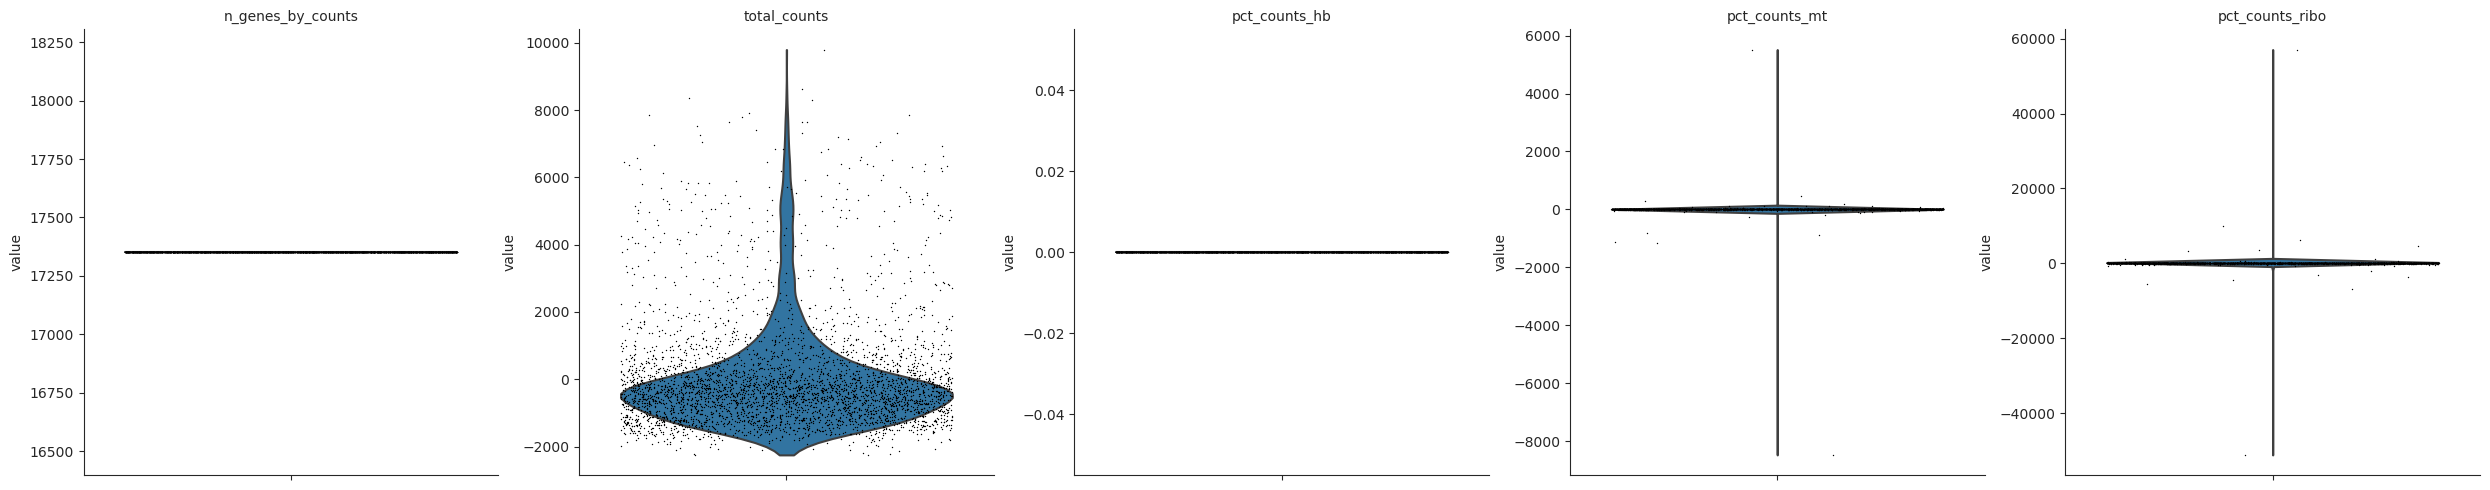

       n_cells_by_counts   mean_counts  log1p_mean_counts  \
count            17351.0  1.735100e+04       1.735100e+04   
mean              3834.0  4.219431e-10       4.219035e-10   
std                  0.0  2.801806e-07       2.801806e-07   
min               3834.0 -2.084351e-06      -2.084354e-06   
25%               3834.0 -1.650263e-07      -1.650263e-07   
50%               3834.0  6.373997e-10       6.373997e-10   
75%               3834.0  1.651060e-07       1.651059e-07   
max               3834.0  1.506315e-06       1.506314e-06   

       pct_dropout_by_counts  total_counts  log1p_total_counts       n_cells  \
count                17351.0  17351.000000        17351.000000  17351.000000   
mean                     0.0      0.000002            0.000001    177.950320   
std                      0.0      0.001074            0.001074    379.319359   
min                      0.0     -0.007991           -0.008024      3.000000   
25%                      0.0     -0.000633        

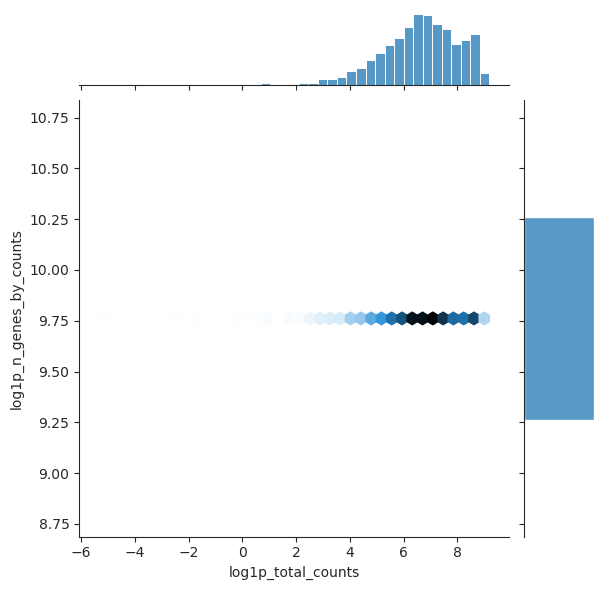

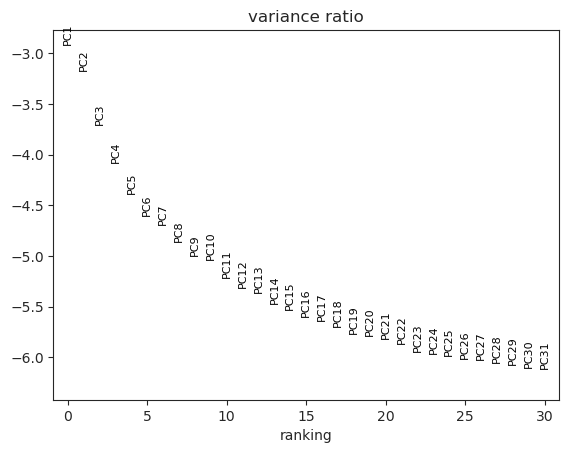

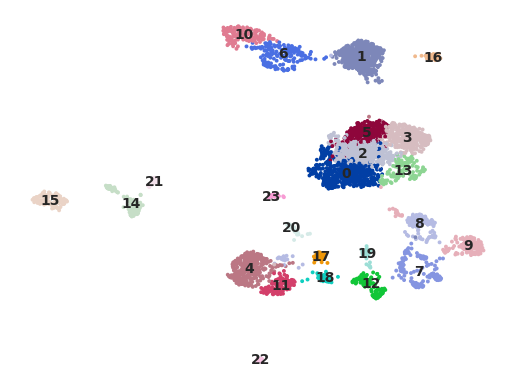


<<< PREPROCESSING CD-2 >>>
AnnData object with n_obs × n_vars = 4957 × 36601
    obs: 'n_counts', 'log_counts', 'n_genes'
    var: 'gene_ids', 'feature_types'
    layers: 'counts'

Un-Used Keyword Arguments: {'assay_protein': None, 'col_batch': 'standard_sample_id', 'col_condition': None, 'kws_umap': {'min_dist': 0.3}}




Cell Counts: Initial

4957


Gene Counts: Initial

None 

 10 

                gene_ids    feature_types
count             36601            36601
unique            36601                1
top     ENSG00000243485  Gene Expression
freq                  1            36601 



<<< PERFORMING QUALITY CONTROL ANALYSIS>>>


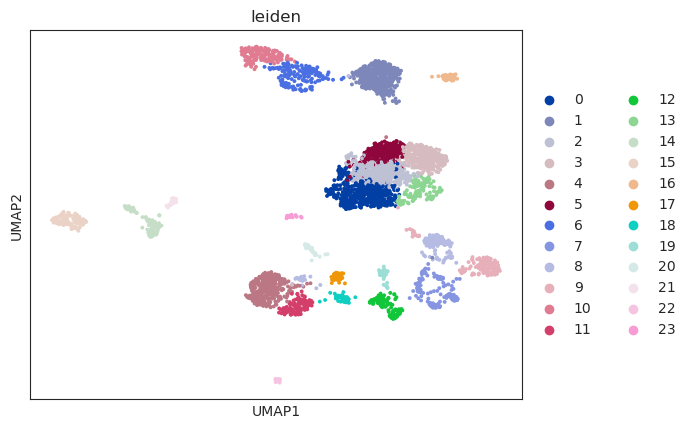

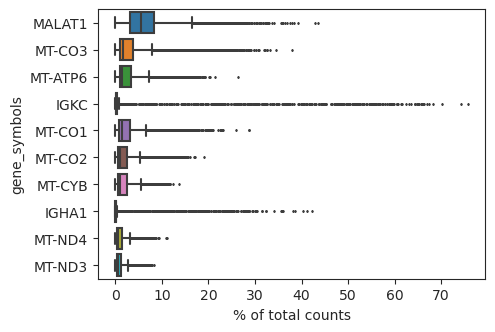


	*** Detecting Mitochondrial, Ribosomal, Hemoglobin genes...

	*** Calculating & plotting QC metrics...




... storing 'feature_types' as categorical


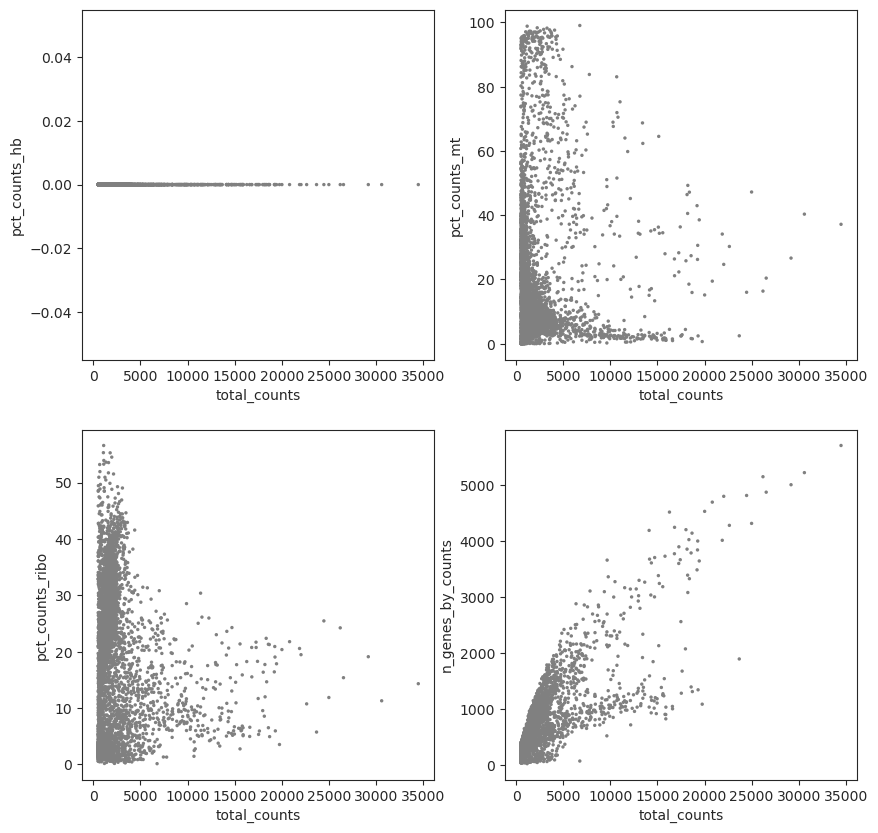

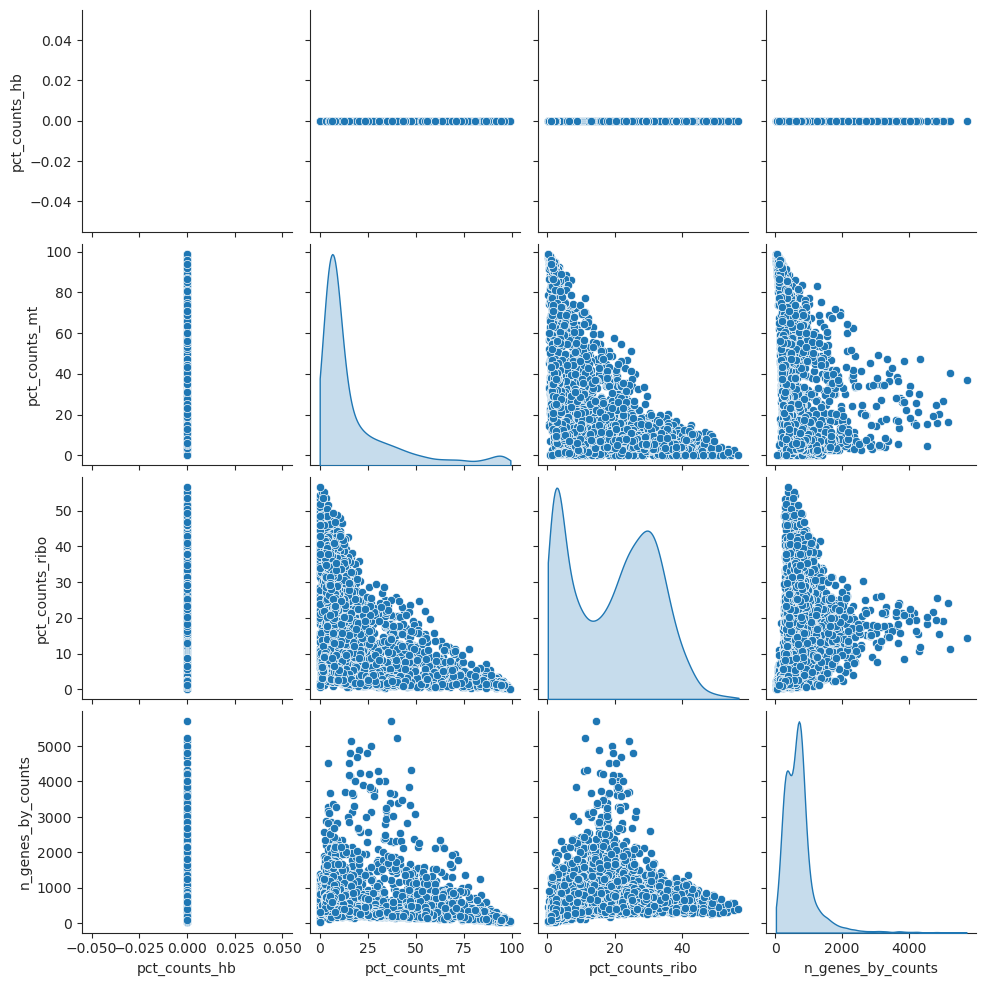

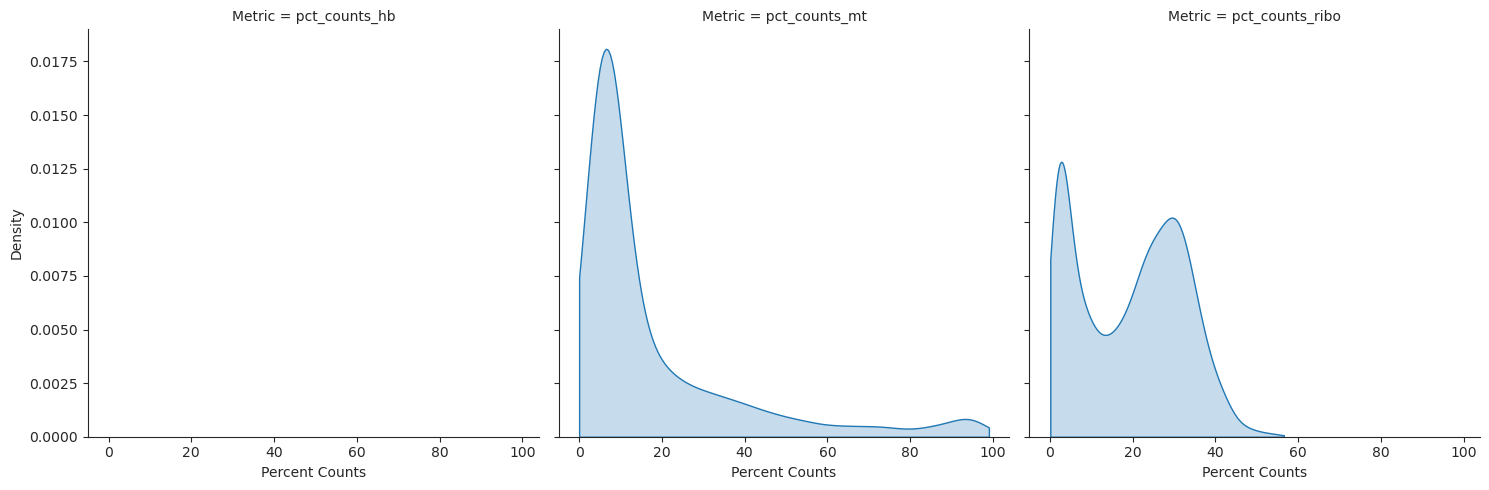

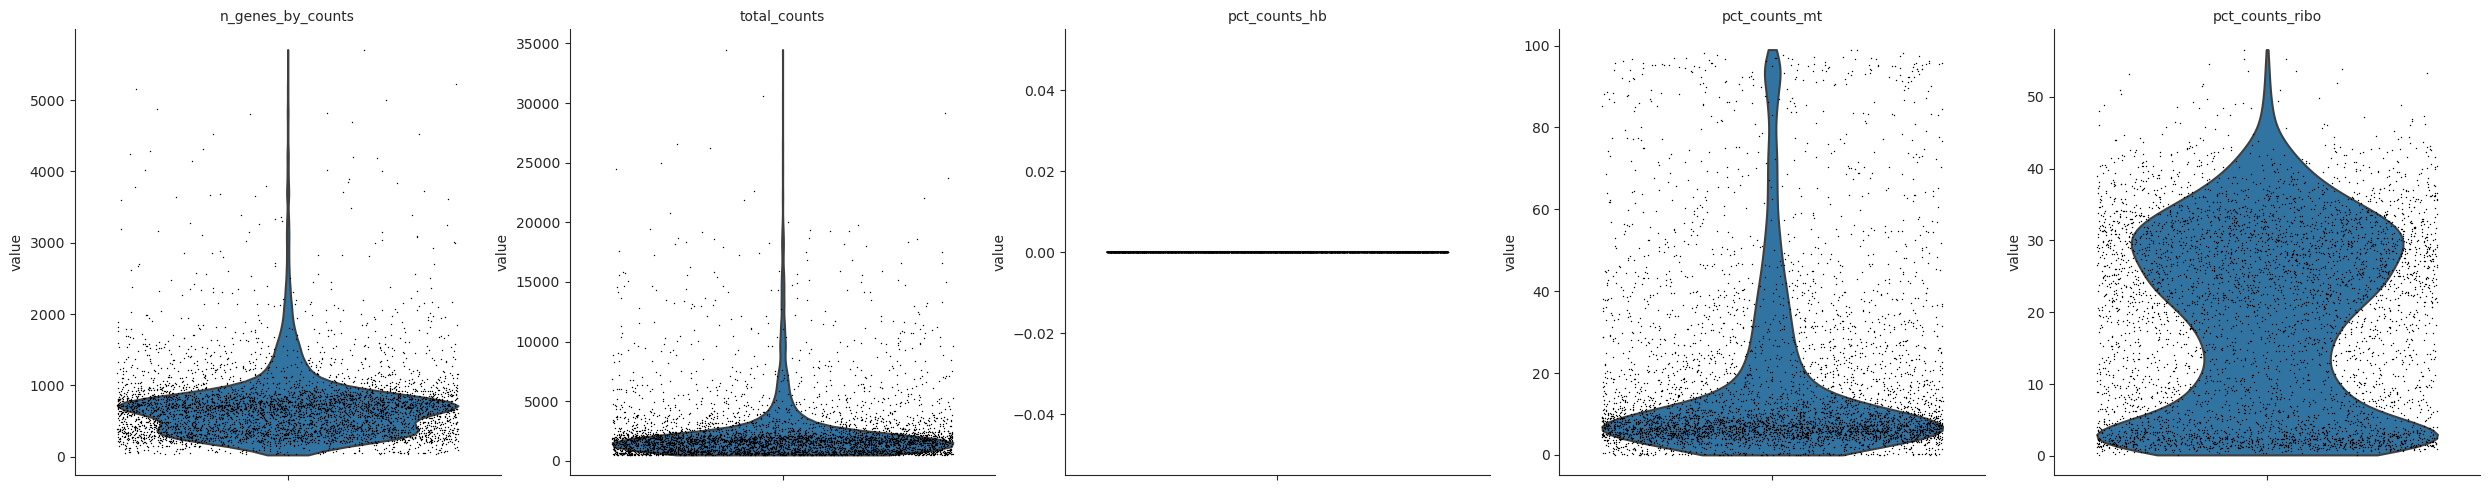

       n_cells_by_counts   mean_counts  log1p_mean_counts  \
count       36601.000000  36601.000000       36601.000000   
mean           96.182673      0.063211           0.028185   
std           315.716714      1.431672           0.142914   
min             0.000000      0.000000           0.000000   
25%             0.000000      0.000000           0.000000   
50%             2.000000      0.000605           0.000605   
75%            67.000000      0.014928           0.014818   
max          4875.000000    177.330841           5.183640   

       pct_dropout_by_counts   total_counts  log1p_total_counts  
count           36601.000000   36601.000000        36601.000000  
mean               98.059660     313.337189            2.200460  
std                 6.369109    7096.797363            2.382028  
min                 1.654226       0.000000            0.000000  
25%                98.648376       0.000000            0.000000  
50%                99.959653       3.000000           

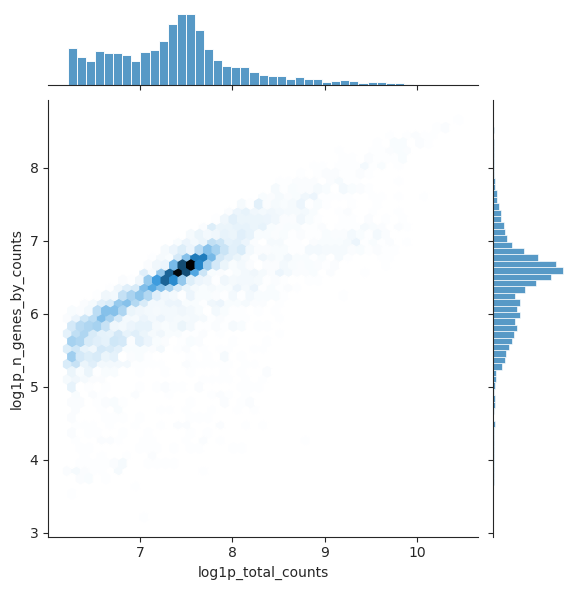

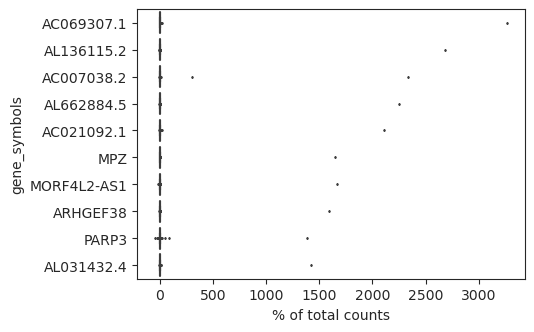


	*** Detecting Mitochondrial, Ribosomal, Hemoglobin genes...

	*** Calculating & plotting QC metrics...




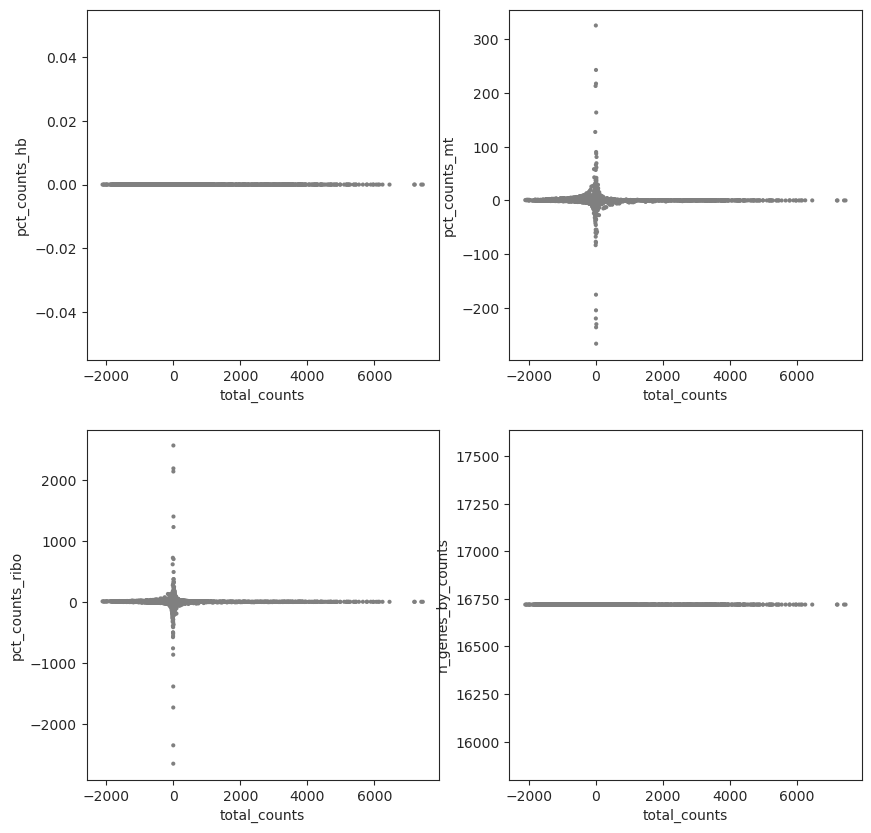

In [50]:
self = Omics(file_path, **kws_init, kws_multi=dict(
    kws_pp=kws_pp, kws_cluster=kws_cluster, kws_harmony=kws_harmony))

# Clustering & Annotations

Clustering was conducted in the individual objects in `cr.pp.create_object_multi()`, but we want to re-do QC and clustering in the overall sample.

## Clustering

We need to have `kws_pca=False` so that the Harmony-adjusted PCA created during integration (rather than a newly-calculated one) will be used.

Un-used Keyword Arguments: {'assay': None, 'col_gene_symbols': 'gene_symbols', 'col_cell_type': 'majority_voting', 'col_sample_id': 'standard_sample_id', 'col_batch': 'standard_sample_id', 'col_condition': None, 'key_control': None, 'key_treatment': None}


<<< EMBEDDING: UMAP >>>

UMAP Keywords:

 {'min_dist': 0.3}


<<< CLUSTERING WITH LEIDEN METHOD >>>


<<< CREATING UMAP PLOTS >>>


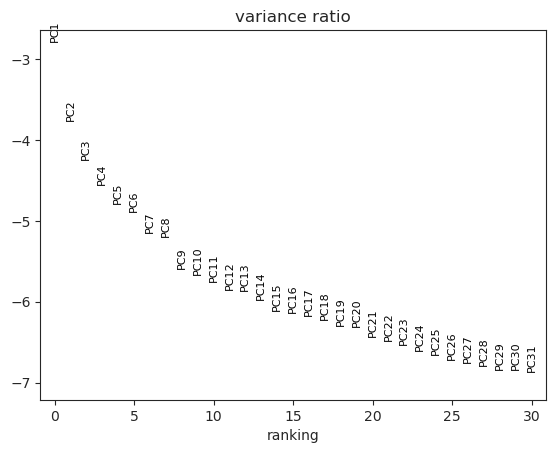

... storing 'gene_ids-CD-1' as categorical
... storing 'gene_ids-CD-2' as categorical
... storing 'gene_ids-CD-3' as categorical
... storing 'gene_ids-CD-4' as categorical


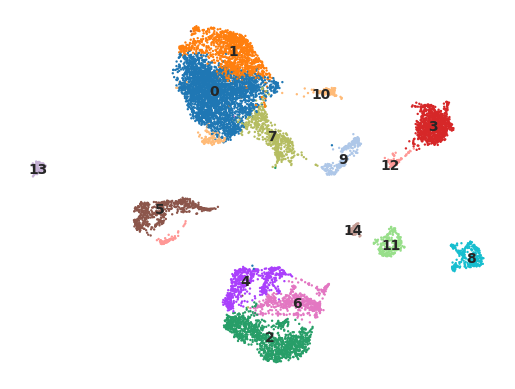

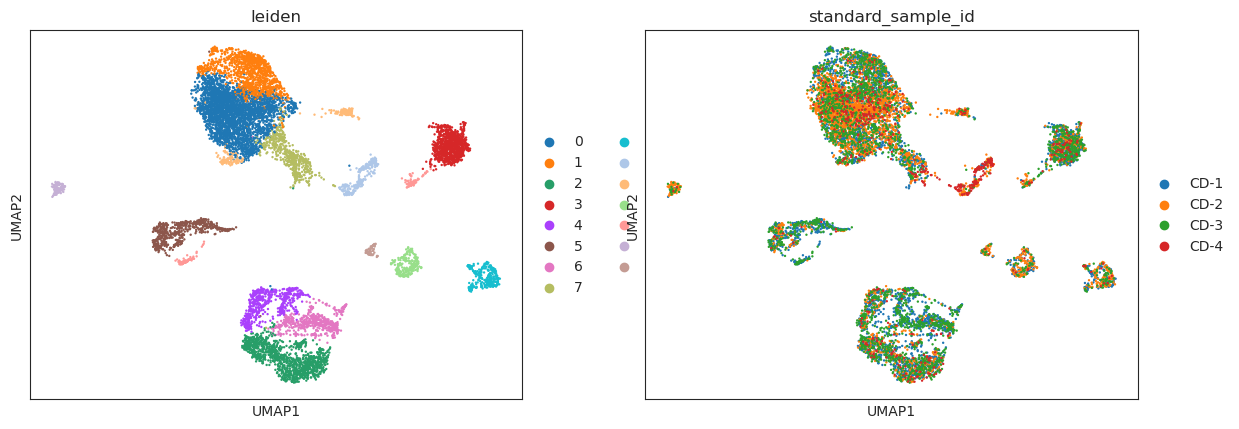

{'pca_var_ratio': None, 'umap': None, 'umap_extra': None}

In [24]:
self.cluster(**{**kws_cluster, "kws_pca": False}, layer="log1p")

## Annotations

Now, annotate with CellTypist.

🔬 Input data has 10289 cells and 18790 genes
🔗 Matching reference genes in the model
🧬 3690 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


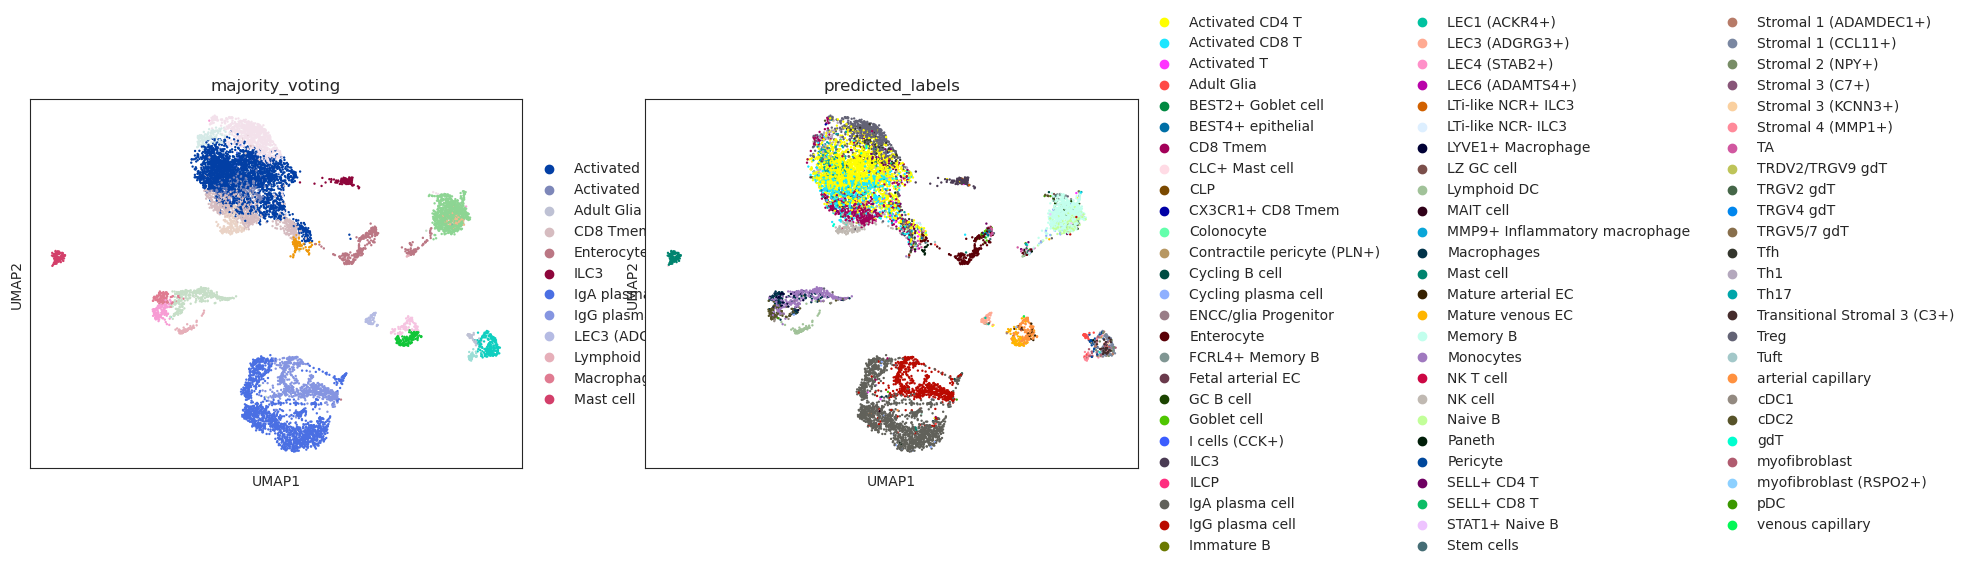

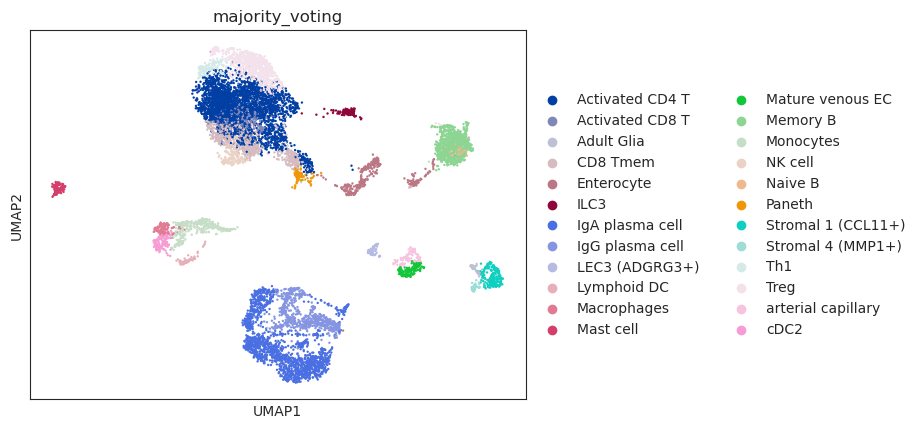

In [28]:
_ = self.annotate_clusters("Cells_Intestinal_Tract.pkl")

{'col_gene_symbols': 'gene_symbols',
 'col_cell_type': 'majority_voting',
 'col_sample_id': 'standard_sample_id',
 'col_batch': 'standard_sample_id',
 'col_condition': None}

# Plots

Create a variety of plots visualizing gene expression, cell clusters, etc.

If you want to focus on a cell type categorization column other than 

You can often specify splitting/color-coding columns to be different across different plots by specifying a different `col_cell_type` argument in their respective `kws_<PLOT>` arguments (e.g., `kws_umap="predicted_labels"`).

By specifying `color` in `kws_umap`, you can create an additional UMAP colored by a column other than the cell type. If you also specified `cell_types_circle` in the main list of arguments, the UMAP will be colored by `kws_umap["color"]` (or the cell type column, if color isn't specified), and the cell types listed in `cell_types_circle` will be circled on it. 

In [39]:
self.adata.obs.loc[self.adata.obs[self._columns["col_sample_id"]].isin(
    ["CD-1", "CD-3"]), "inflam_status"] = "Inflamed"
self.adata.obs.loc[self.adata.obs[self._columns["col_sample_id"]].isin(
    ["CD-2", "CD-4"]), "inflam_status"] = "Un-Inflamed"

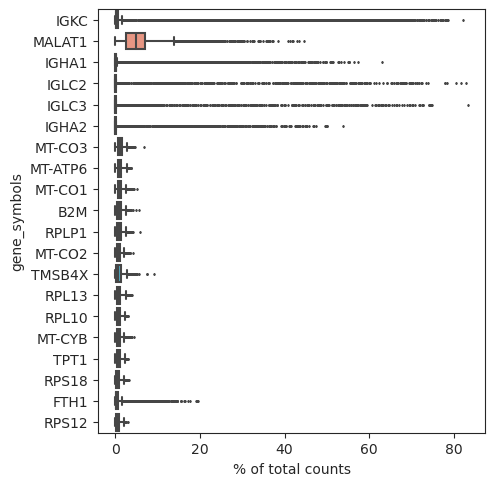

... storing 'inflam_status' as categorical



	*** Detecting Mitochondrial, Ribosomal, Hemoglobin genes...

	*** Calculating & plotting QC metrics...




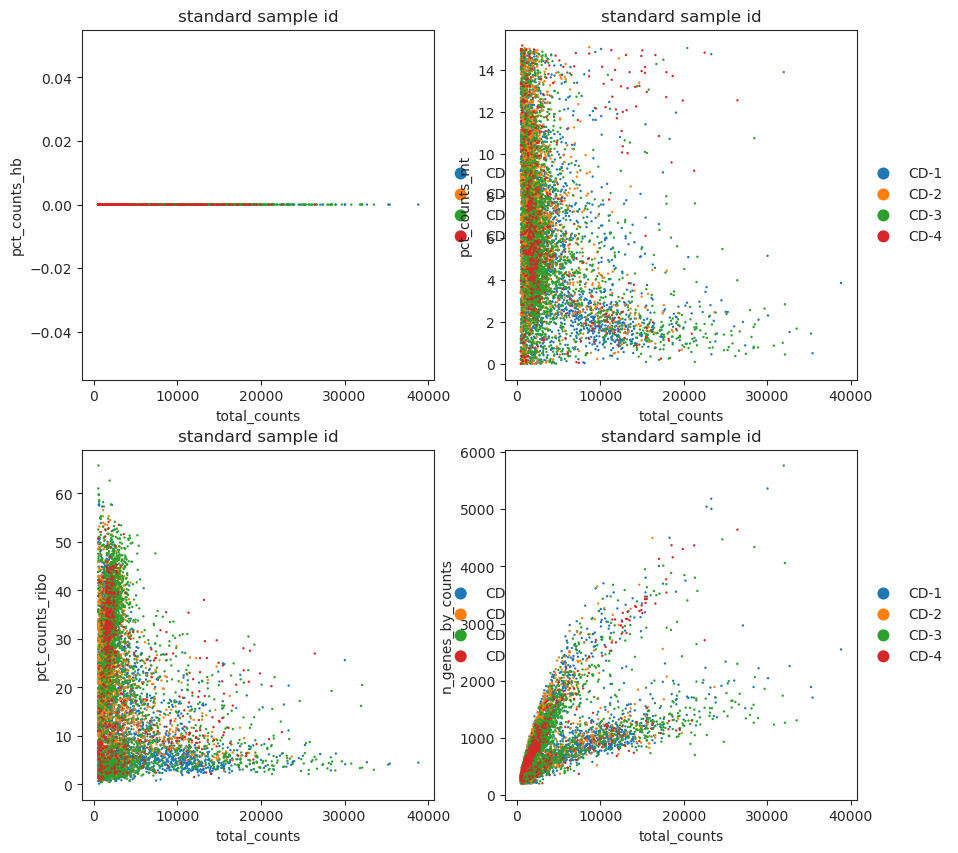

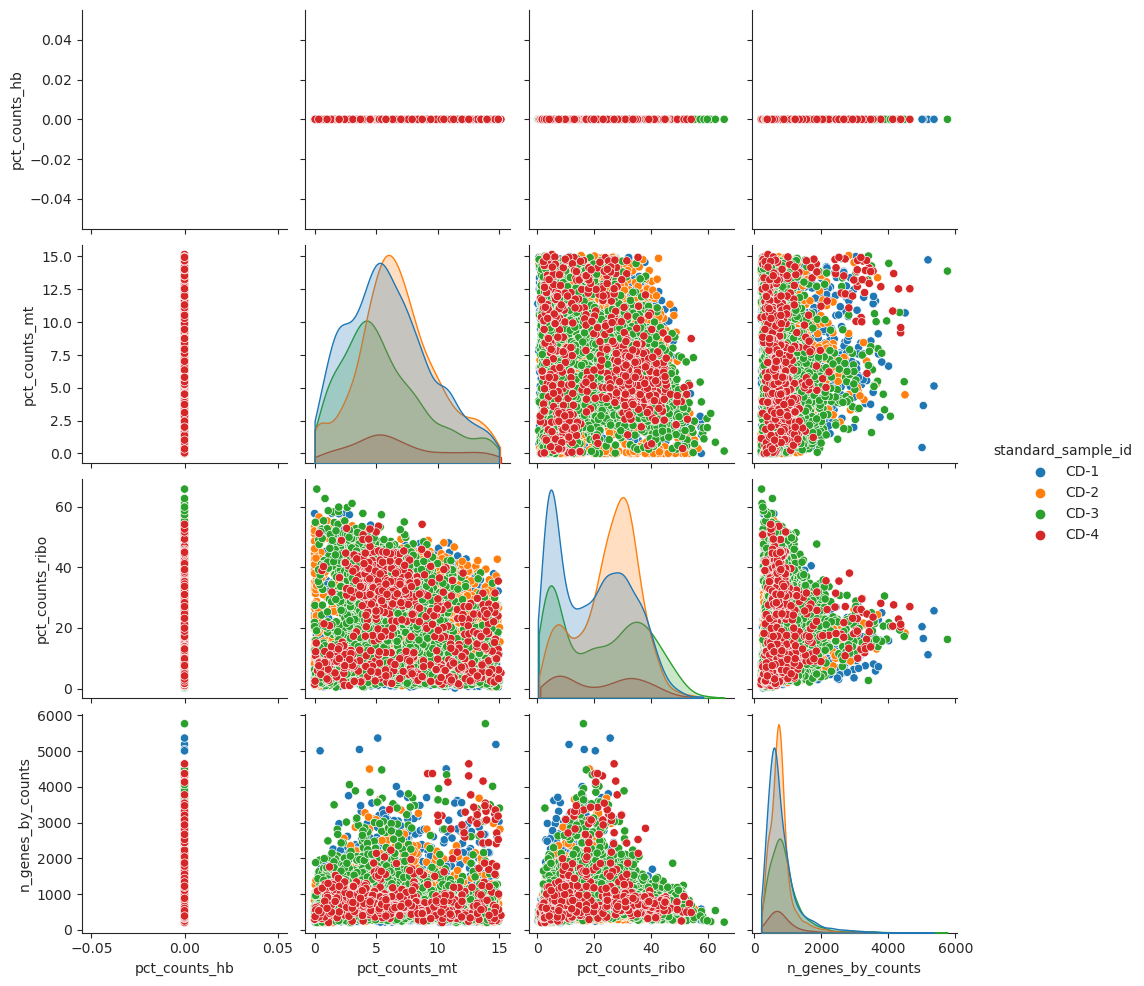

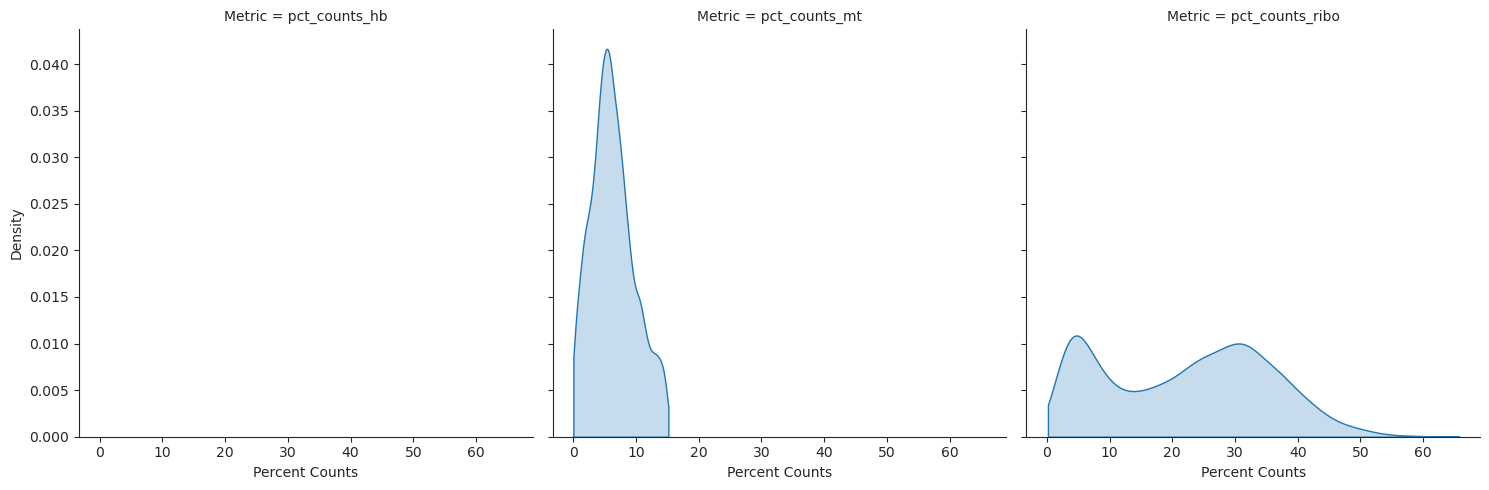

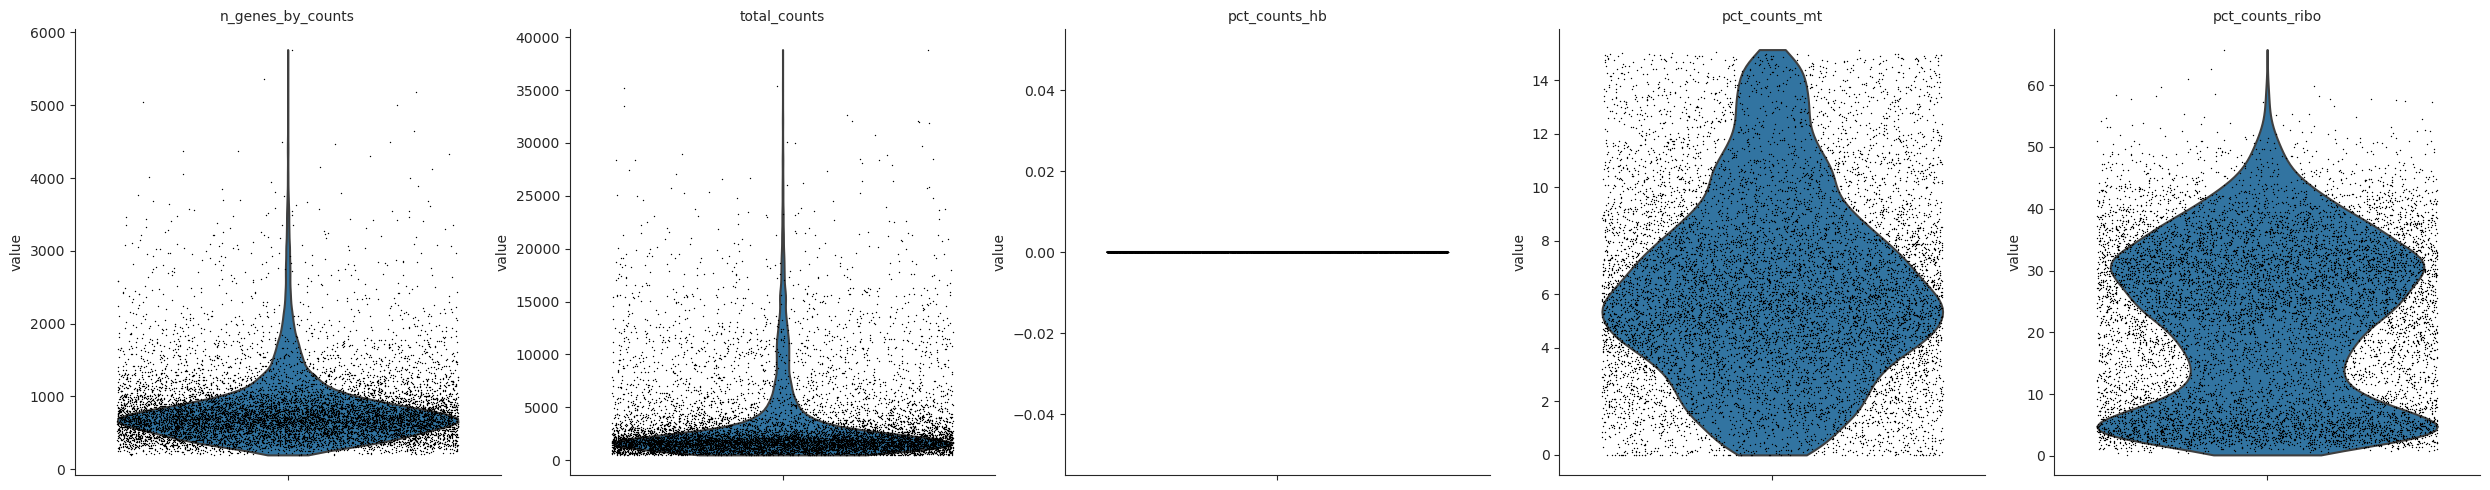

... storing 'inflam_status' as categorical


       n_cells_by_counts-CD-1  mean_counts-CD-1  log1p_mean_counts-CD-1  \
count                 17351.0      1.735100e+04            1.735100e+04   
mean                   3834.0      4.219429e-10            4.219036e-10   
std                       0.0      2.801806e-07            2.801806e-07   
min                    3834.0     -2.084351e-06           -2.084354e-06   
25%                    3834.0     -1.650263e-07           -1.650263e-07   
50%                    3834.0      6.373997e-10            6.373997e-10   
75%                    3834.0      1.651059e-07            1.651059e-07   
max                    3834.0      1.506315e-06            1.506314e-06   

       pct_dropout_by_counts-CD-1  total_counts-CD-1  log1p_total_counts-CD-1  \
count                     17351.0       17351.000000             17351.000000   
mean                          0.0           0.000002                 0.000001   
std                           0.0           0.001074                 0.001074   


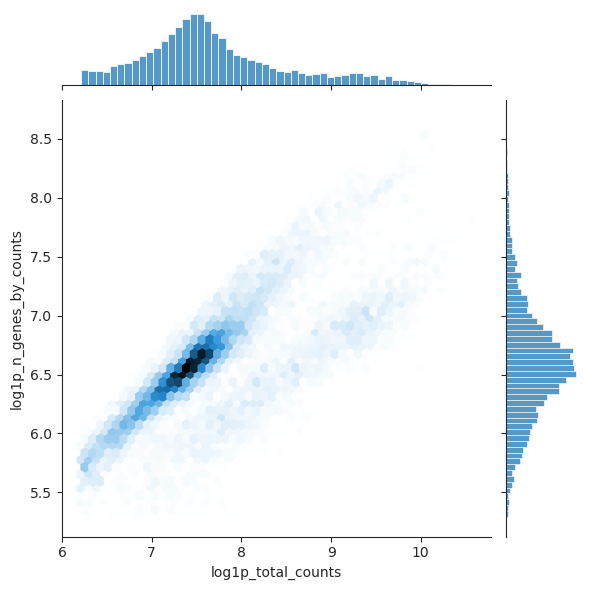

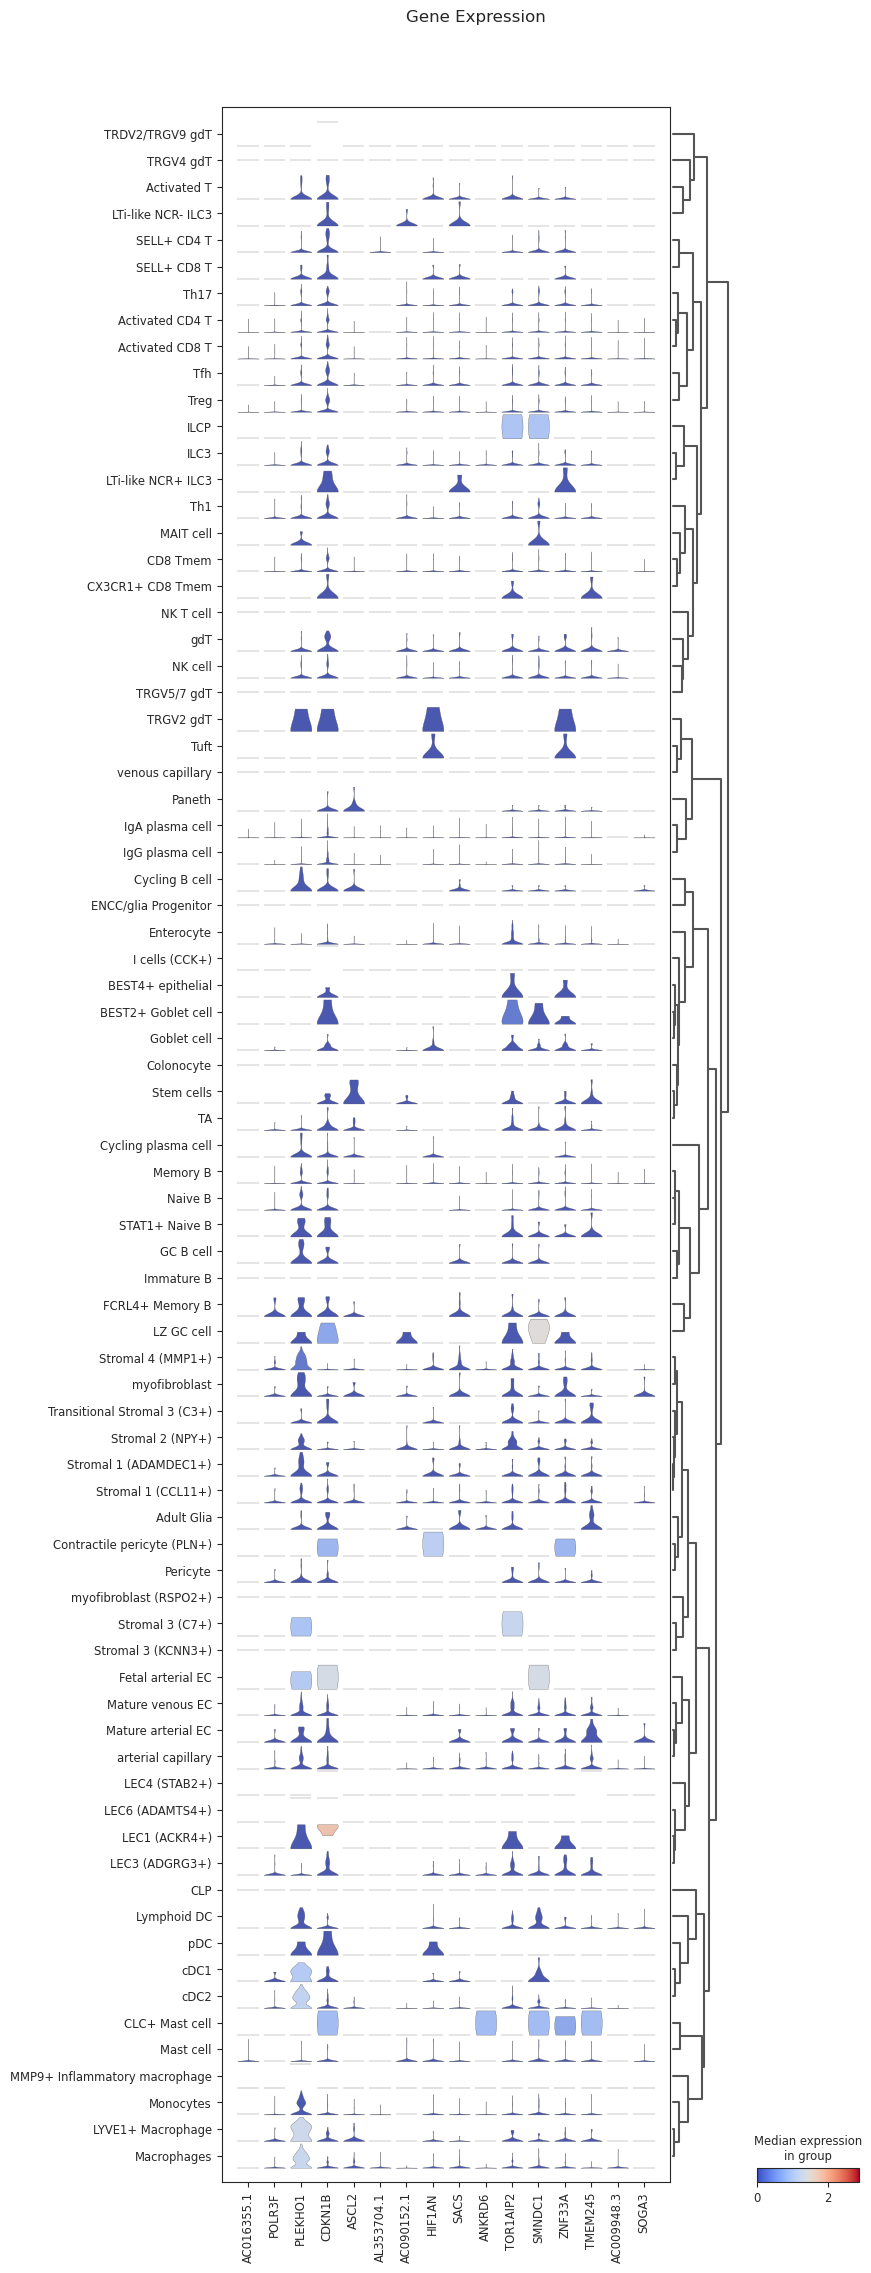

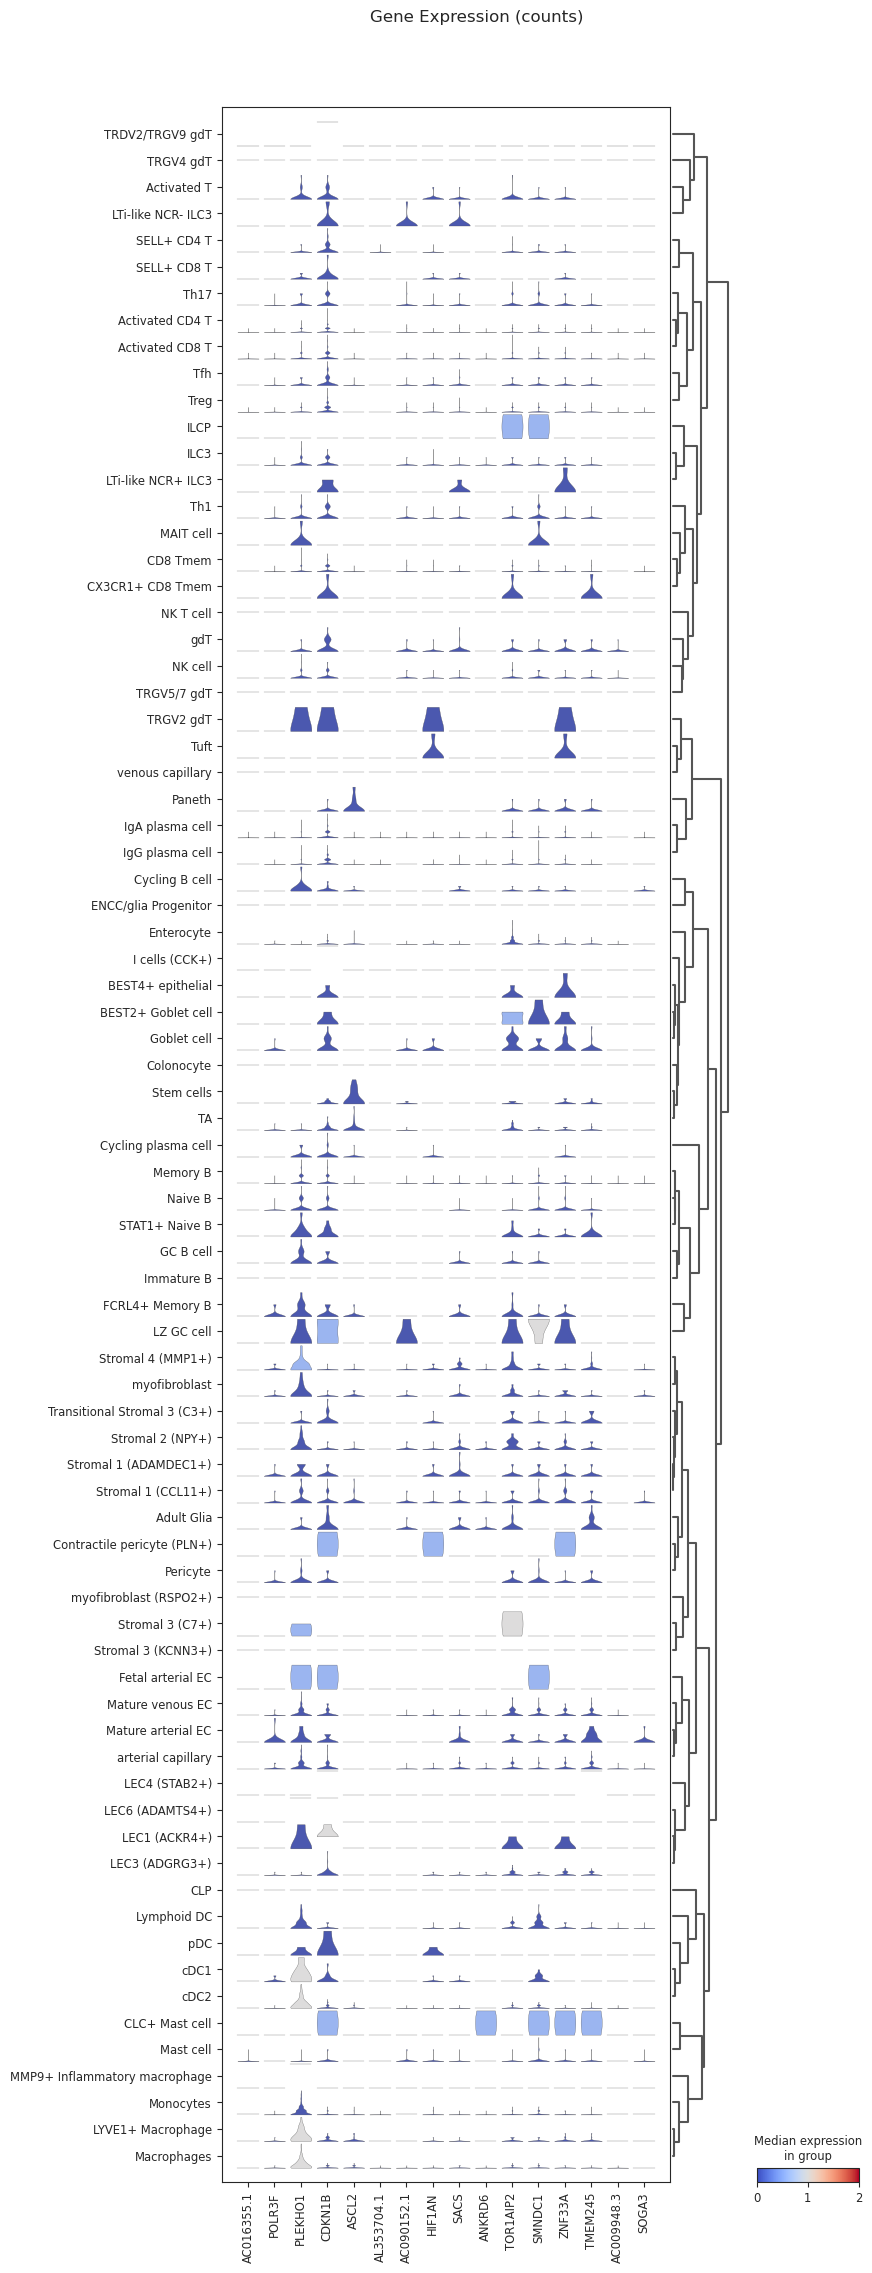

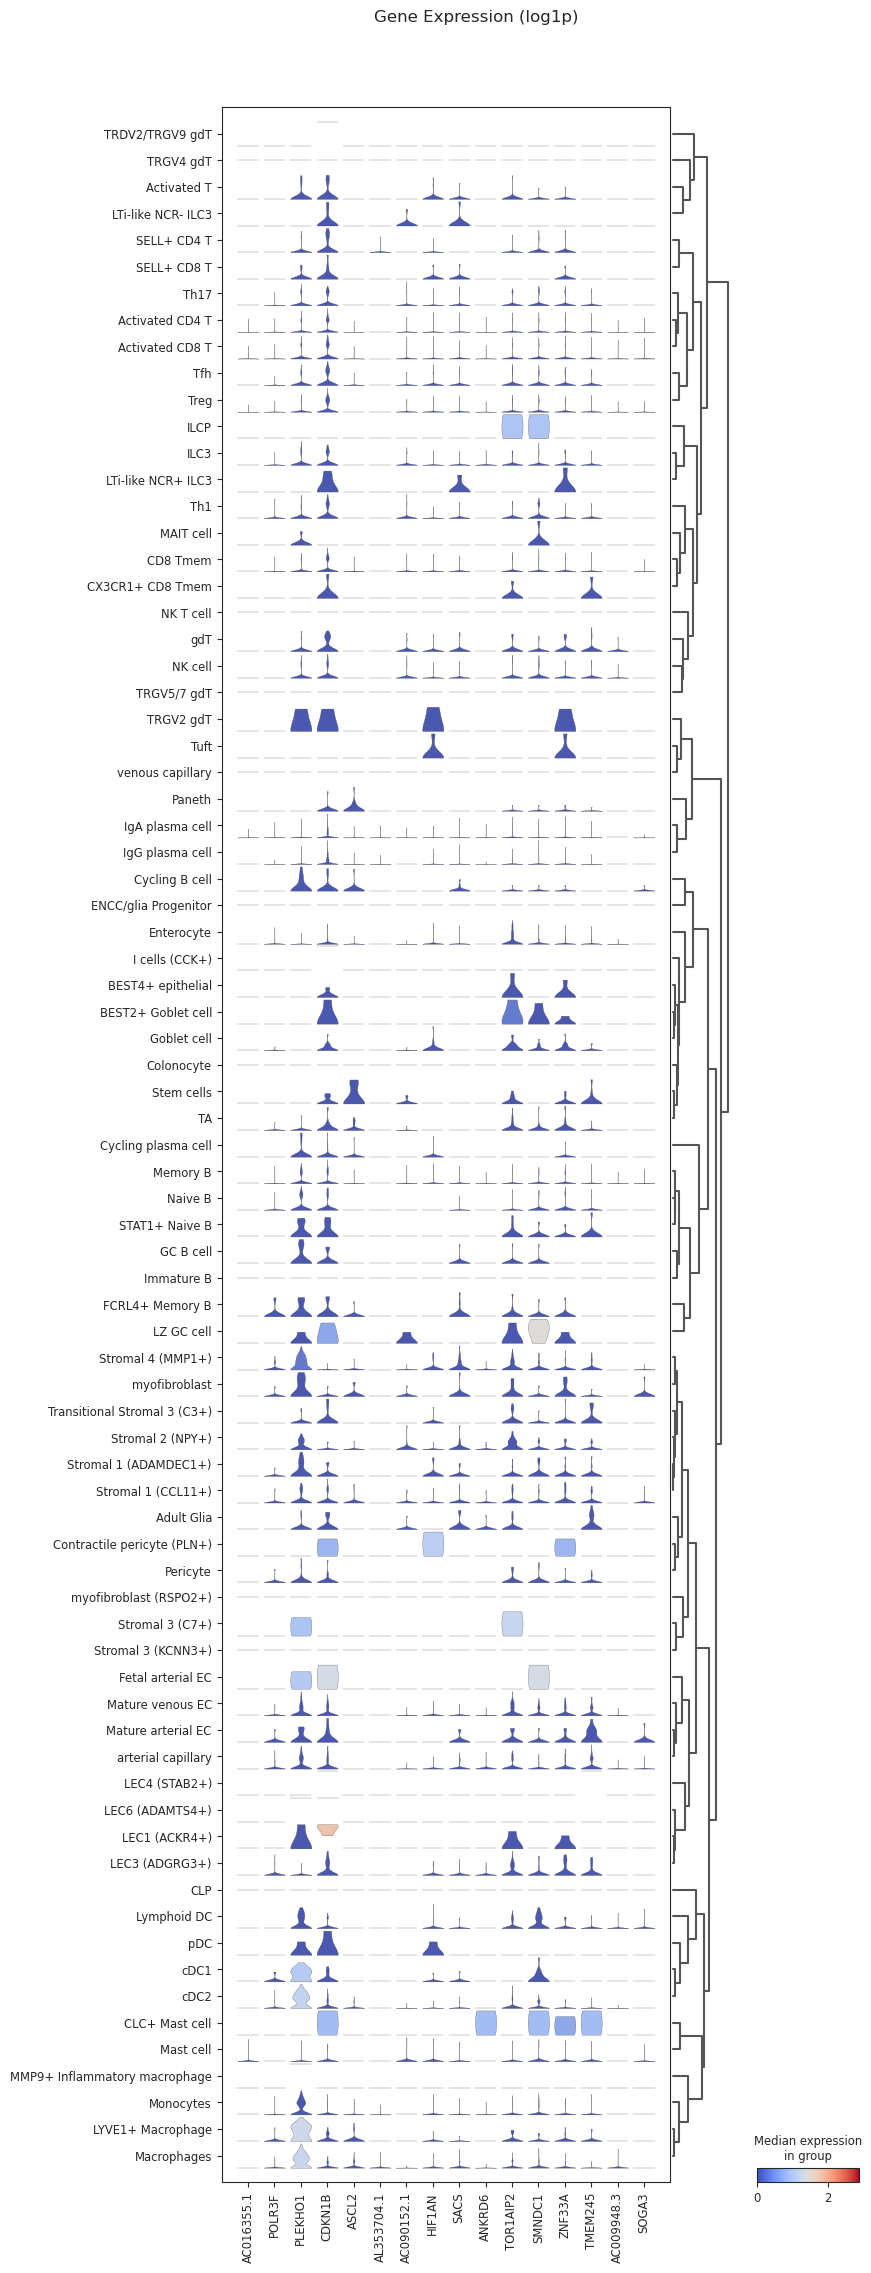

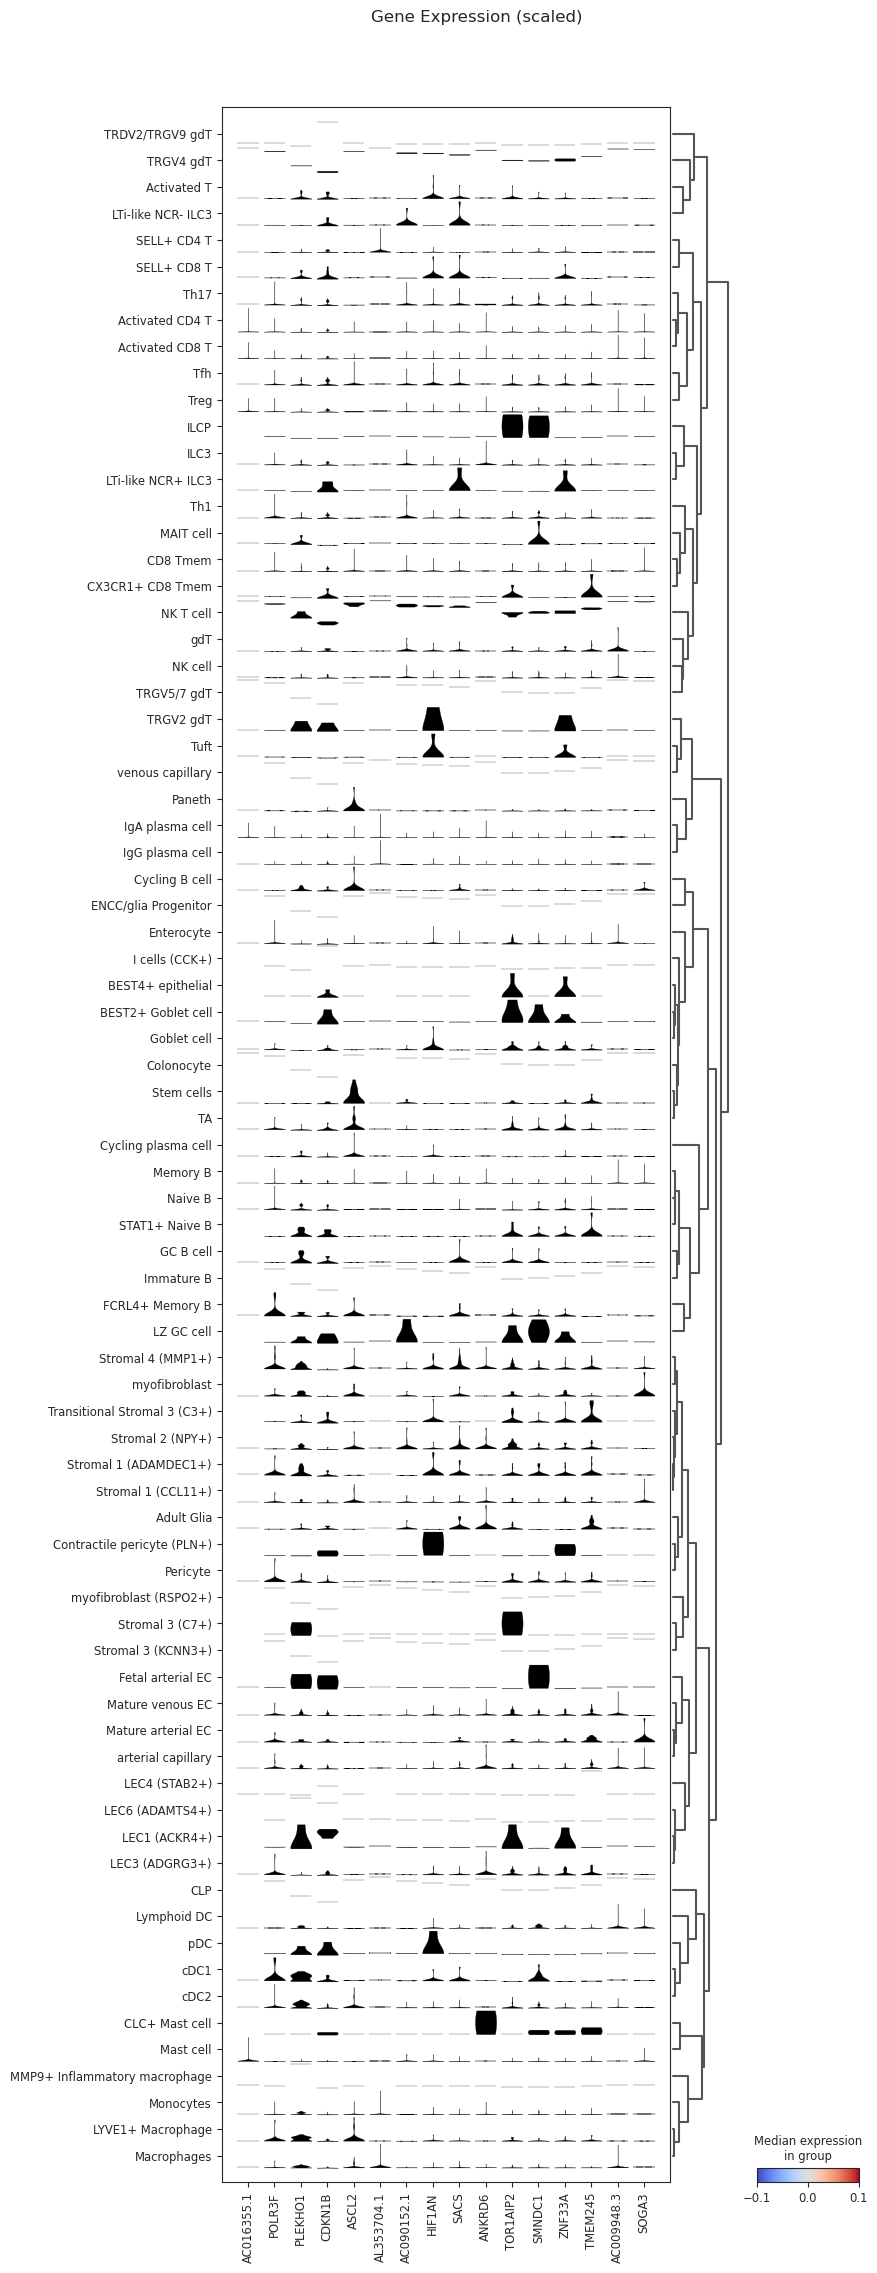


<<< PLOTTING GEX (Dot) >>>

<<< PLOTTING UMAP >>>

<<< PLOTTING UMAP >>>

<<< PLOTTING GEX ON UMAP >>>

<<< PLOTTING inflam_status on UMAP >>>


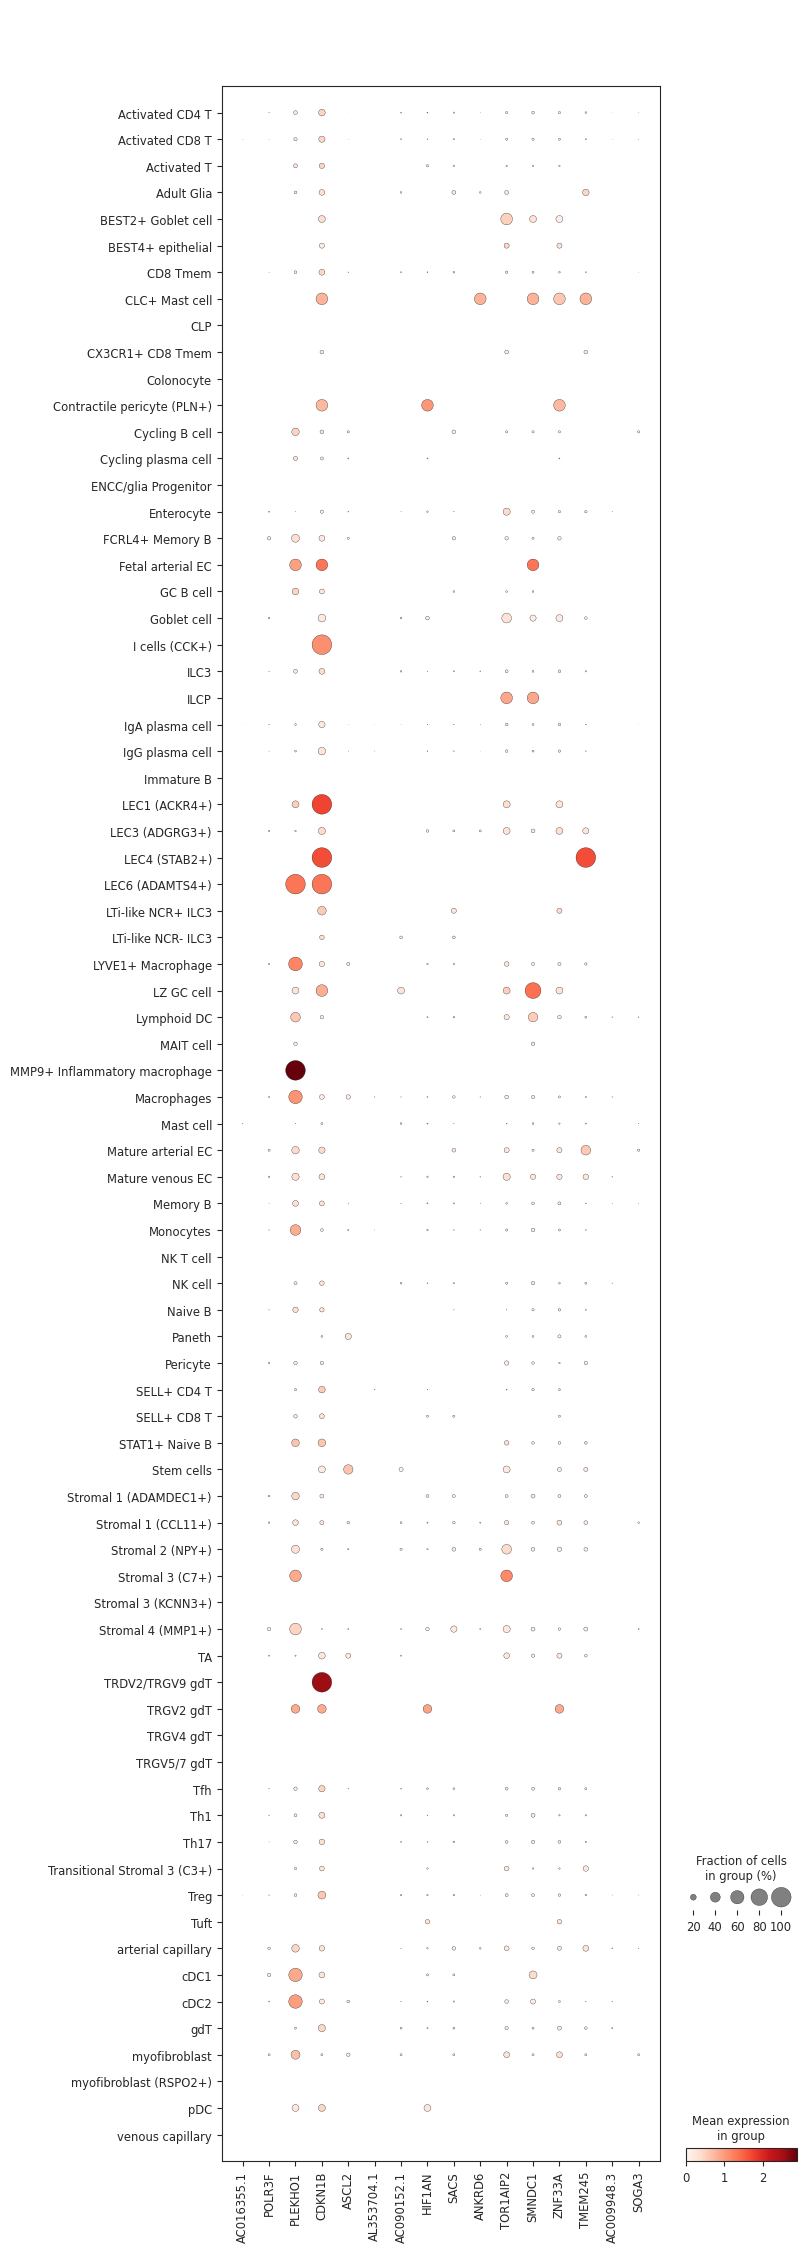

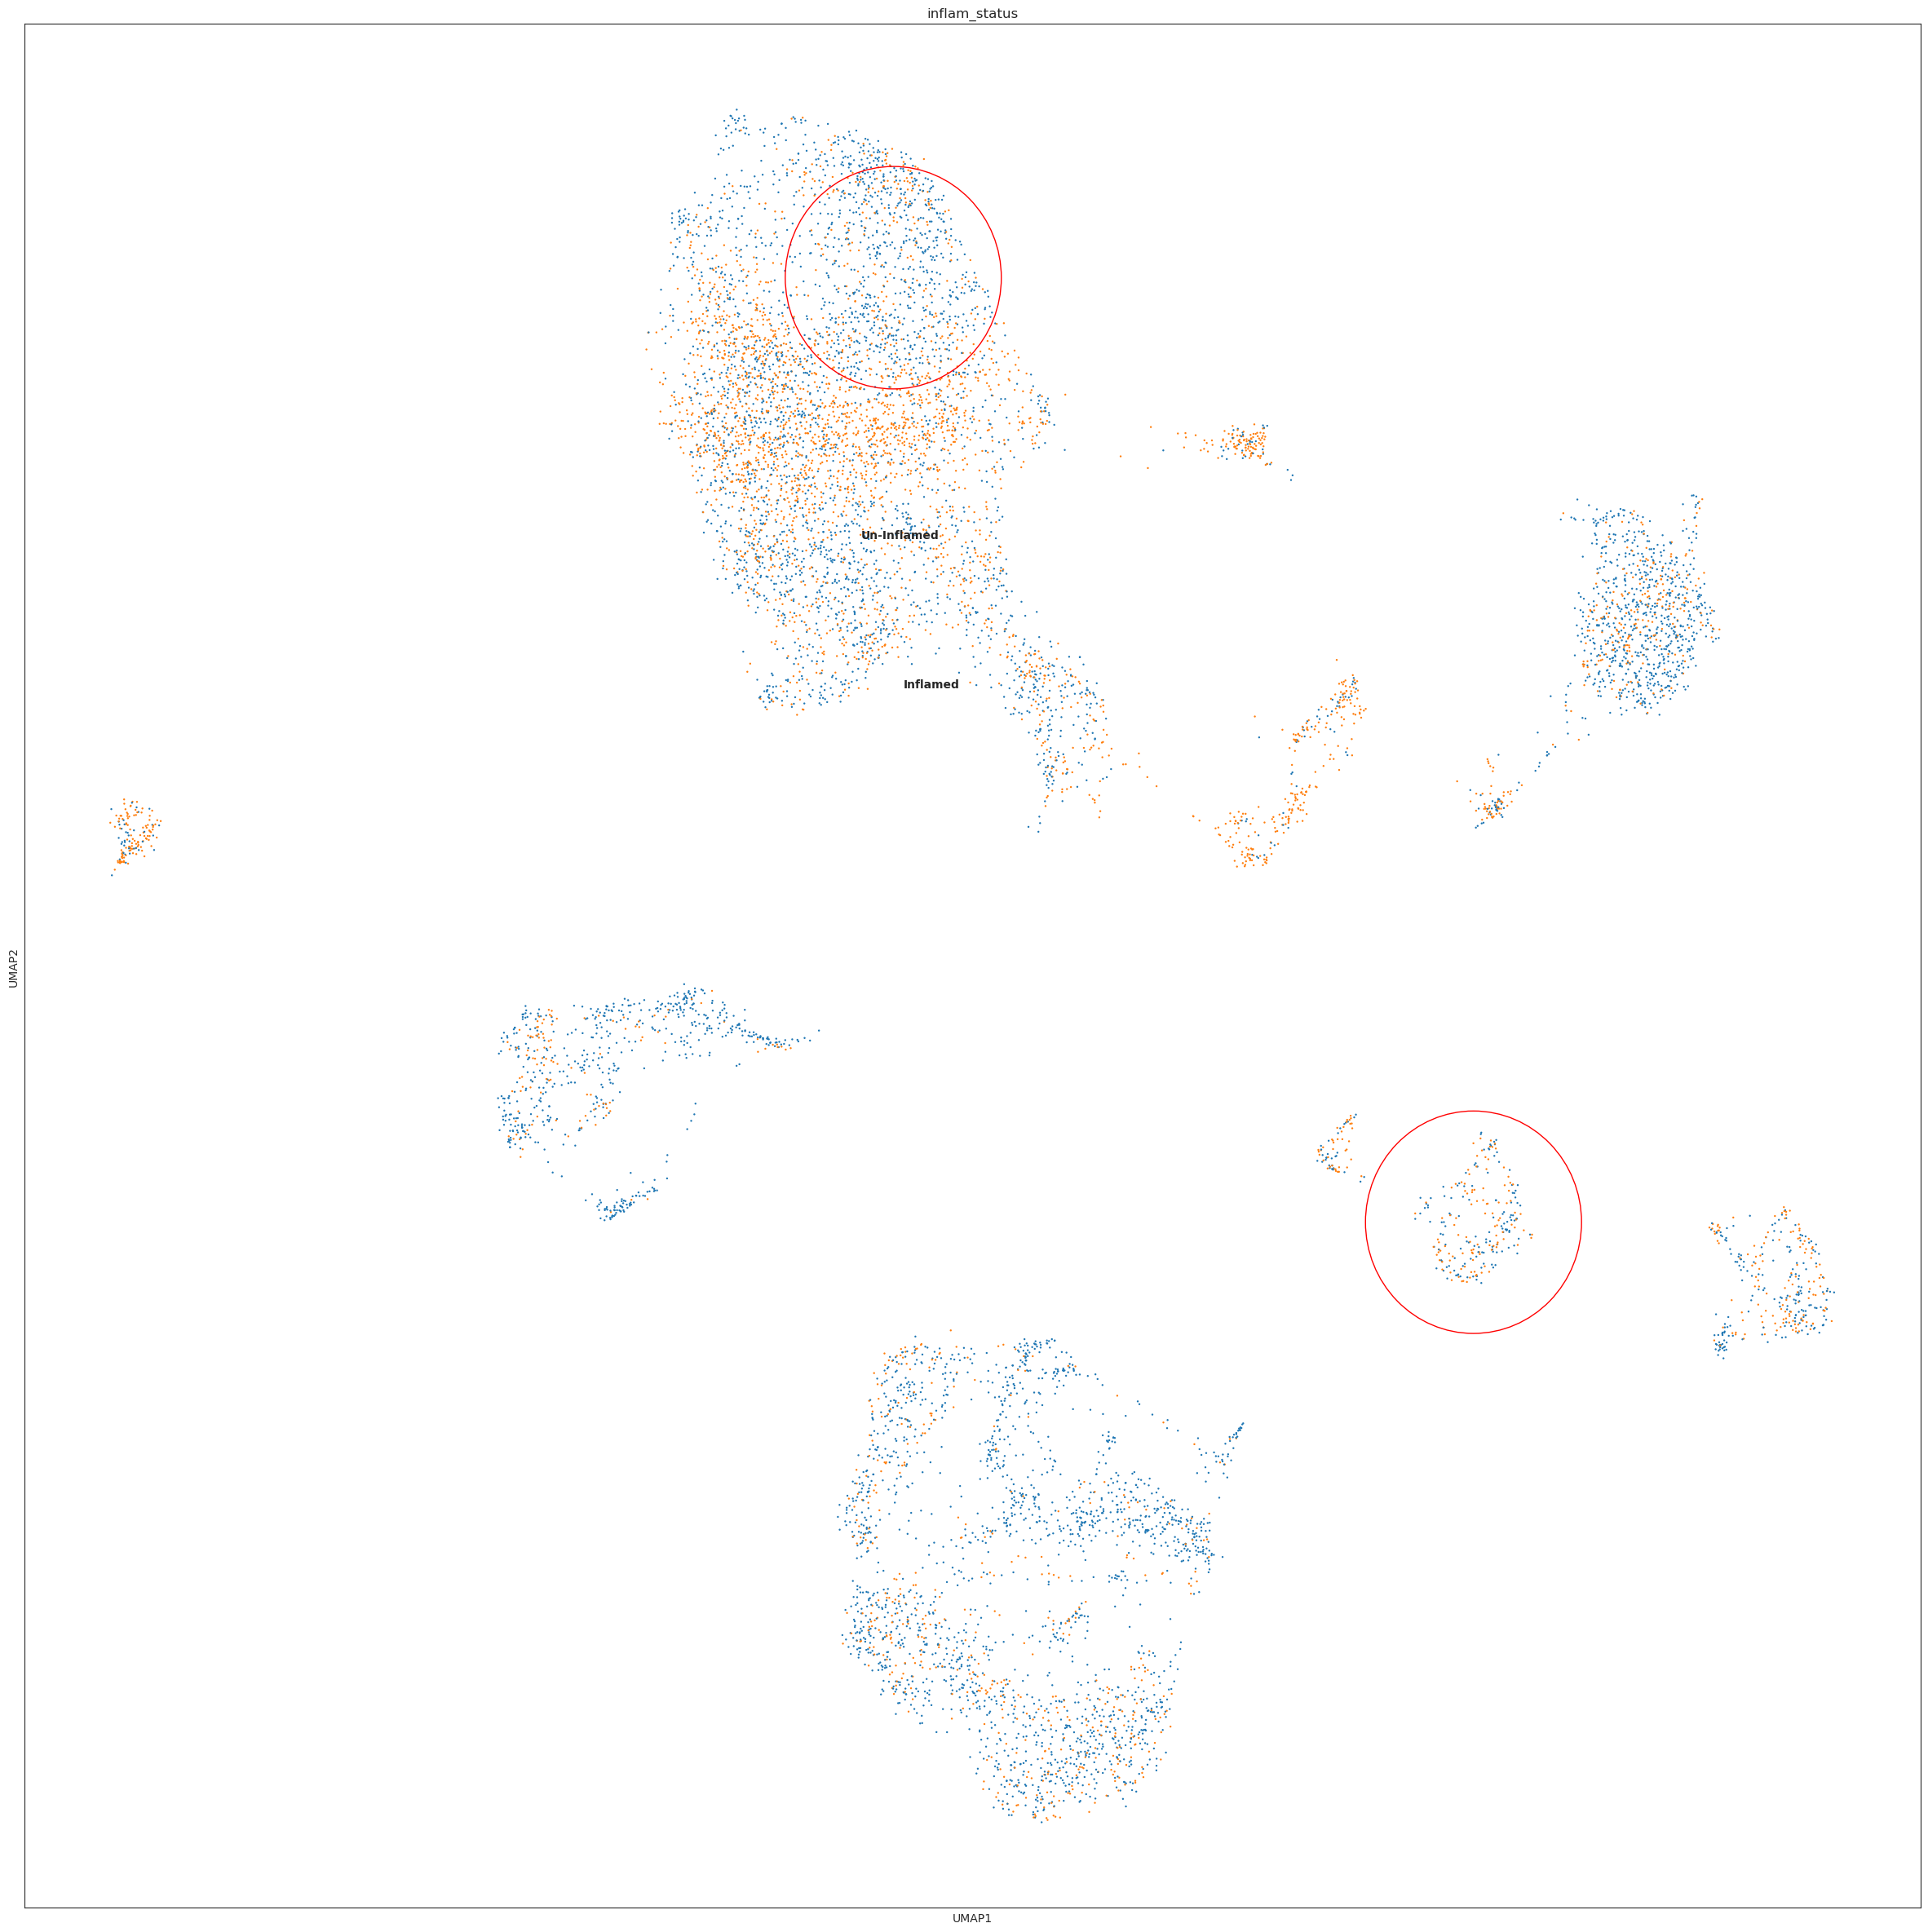

In [40]:
clus = list(self.rna.obs["predicted_labels"].sample(2))  # clusters to circle
kgh = list(pd.Series(self.rna.var_names).sample(2))  # gene labels: highlight 
figs = self.plot(genes=16,  # or could specify list of gene names
                 col_cell_type="majority_voting",
                 cell_types_circle=clus,  # list cell types to circle on UMAP
                 kws_gex_violin=dict(scale="area", height=10),
                 genes_highlight=None,  # could be genes names to highlight
                 kws_umap=dict(col_cell_type="predicted_labels",
                               color="inflam_status"))  # for UMAP